## Step0: E-Commerce 데이터와 군집분석의 활용

### E-Commerce & Platform Business에서의 판매자(공급)

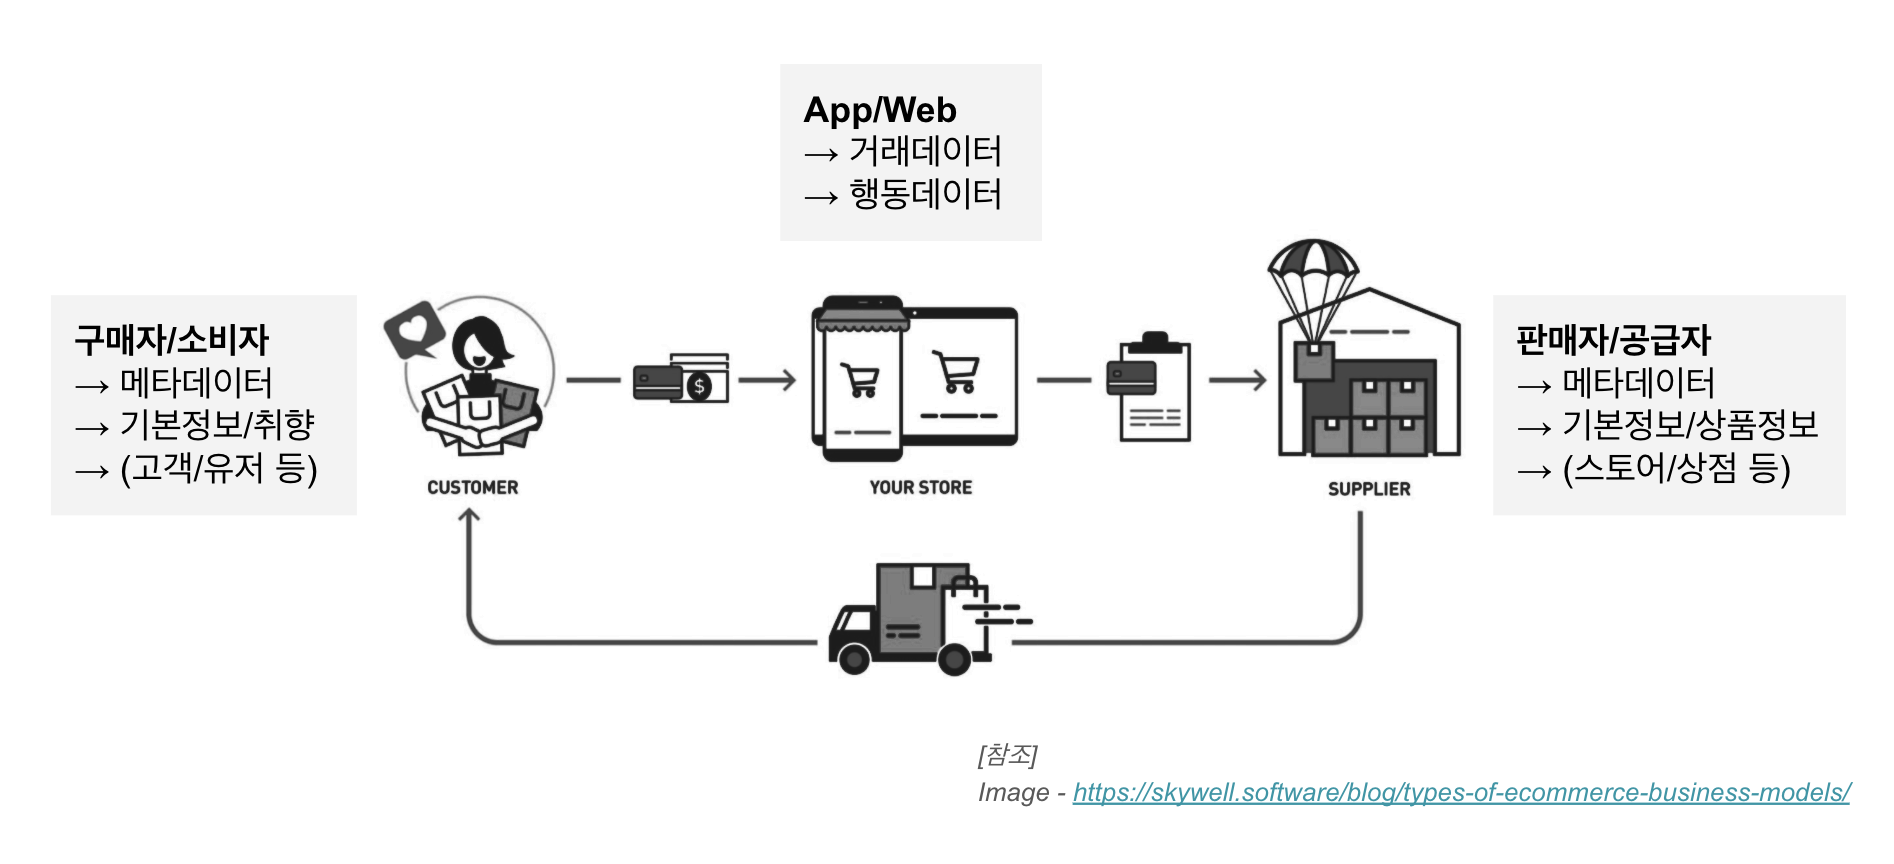

### Platform Business 판매자(공급) 데이터에 사용되는 용어

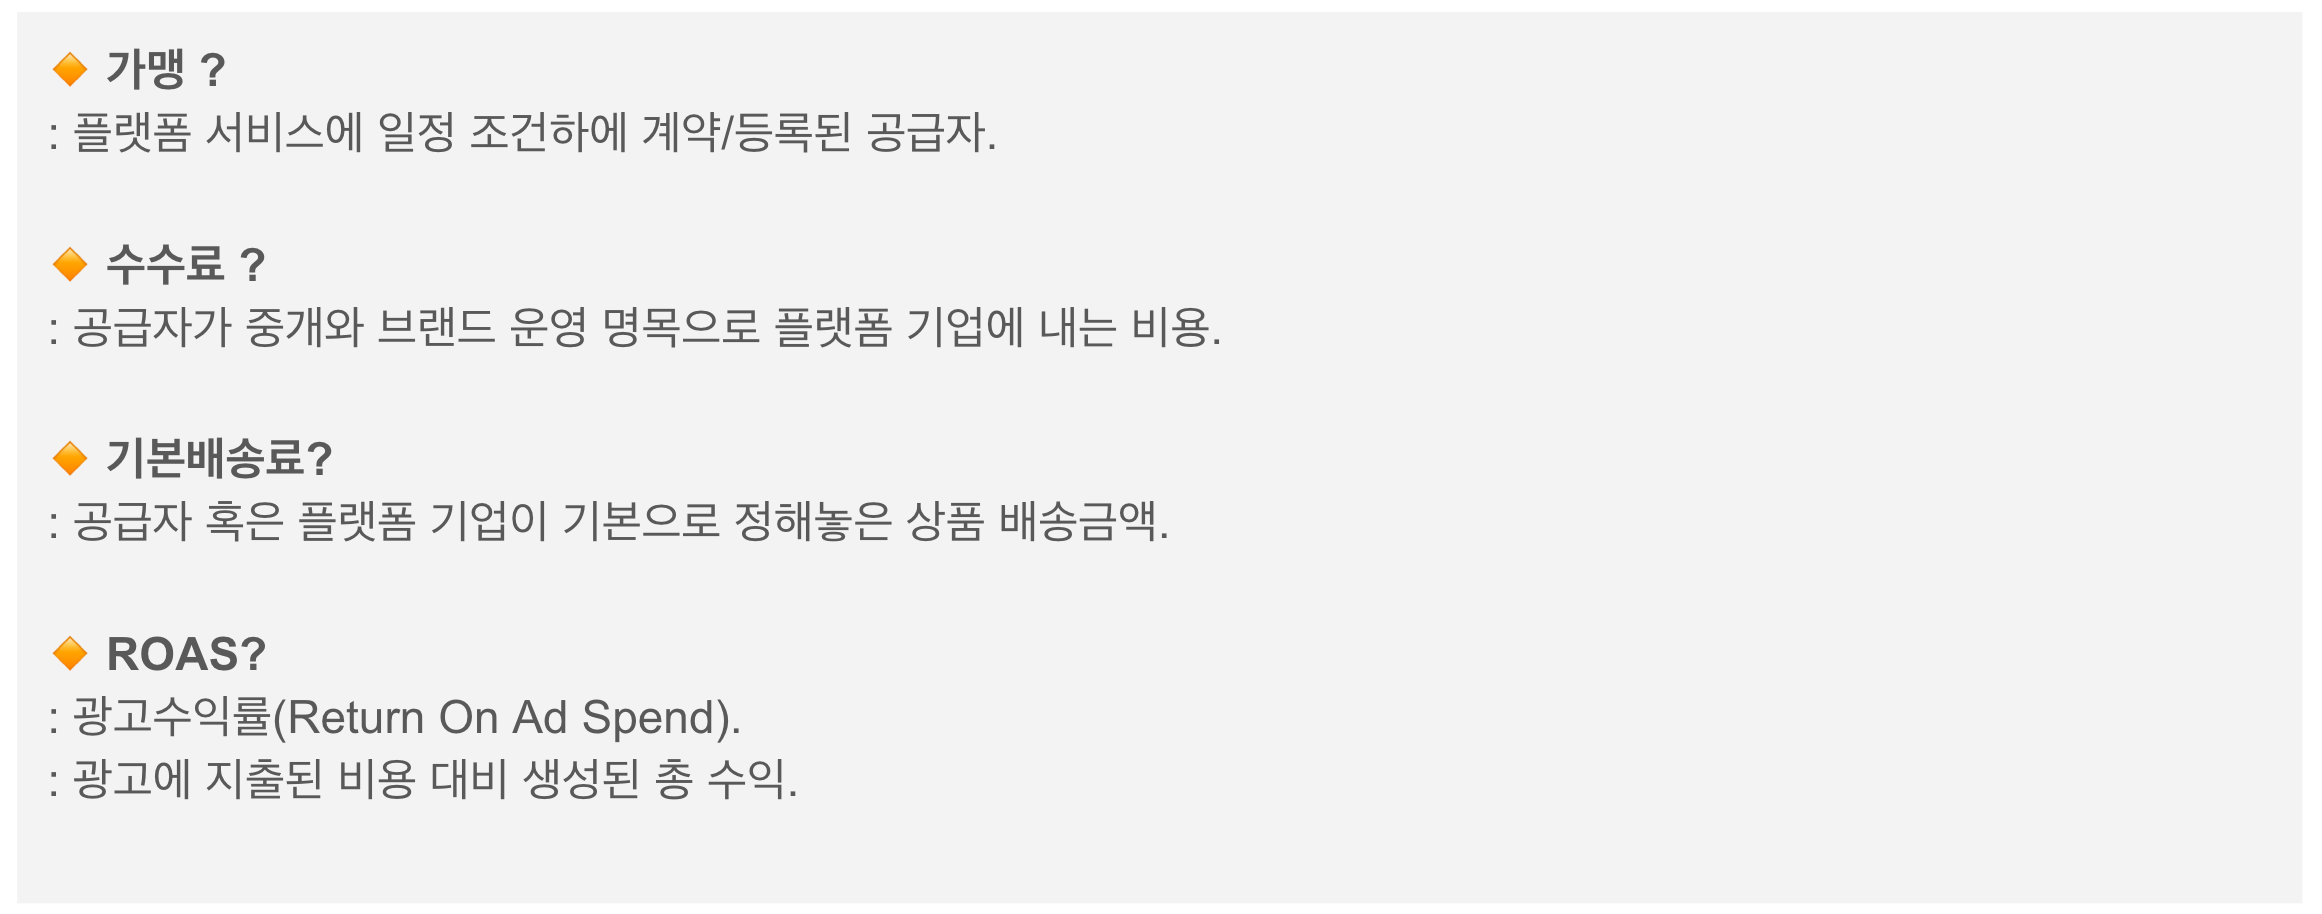

## Step1: E-Commerce 판매자(공급) 데이터 불러오기 & 전처리


### 문제 1. E-Commerce 데이터 불러오기 (stores, orders)
: 주어진 url을 사용해서 E-Commerce 데이터를 다운로드 받아보세요.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore') 
pd.set_option('display.max_columns', None)


In [2]:
# 데이터 url.
vendor_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_meta_data.csv"
vendor_statsdata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_stats_data.csv"

# 위의 url를 사용해서 각각의 DataFrame을 생성해보세요.
vendor_metadata_df = pd.read_csv(vendor_metadata_url, parse_dates=[0])
vendor_stats_df = pd.read_csv(vendor_statsdata_url, parse_dates=[0])


In [3]:
# load된 데이터의 형태(shape)을 확인해보세요.
vendor_metadata_df.shape, vendor_stats_df.shape

((4588, 7), (4588, 11))

In [4]:
vendor_metadata_df.head()

vendor_id  if_affiliation joined_date  bookmark_cnt  item_cnt  \
0  19sJIV53qJApk91            True  2019-10-23            74       126   
1  UChsuoA4cPkm4Uj            True  2019-10-27          1592       114   
2  CJ8MPRrVm66EPmG           False  2016-11-19            96        10   
3  svRpN9sEzk8r7Ws            True  2019-05-16           329        20   
4  refHs4aaigBf2DN            True  2019-03-17          1664        48   

   base_shipping_fee  commission_rate  
0             2000.0             0.22  
1             1600.0             0.25  
2             1600.0             0.04  
3             1900.0             0.11  
4             1300.0             0.08

In [5]:
vendor_stats_df.head()

vendor_id  weekly_order_cnt  monthly_order_cnt  total_order_cnt  \
0  19sJIV53qJApk91              1.71                6.0               12   
1  UChsuoA4cPkm4Uj              1.71                6.0               12   
2  CJ8MPRrVm66EPmG              1.20                1.5               12   
3  svRpN9sEzk8r7Ws              2.40                4.0               12   
4  refHs4aaigBf2DN              1.71                2.4               12   

   total_user_cnt      avg_cost  avg_delivery_cost  roas_growth_rate  \
0              11  24200.000000         916.666667          0.104453   
1               9  46916.666667           0.000000          0.095133   
2               9  21875.000000        7375.000000          0.289356   
3               9  21808.333333        2041.666667          0.177325   
4               9  22000.000000        1750.000000          0.097580   

   review_score  review_rate  review_reply_rate  
0          2.41         0.39               0.04  
1          1.09         0.45               0.13  
2          3.69         0.51               0.22  
3          2.70         0.48               0.06  
4          1.12         0.50               0.26

### 문제 2. E-Commerce 판매자 메타데이터 둘러보기 (metadata)
: 데이터별 컬럼 명세서를 통해 E-Commerce 판매자 메타 데이터를 파악해보세요.

#### [Vendor metadata 컬럼 명세서]  

컬럼명 | 설명
--- | ---
vendor_id | 판매자 고유 ID
if_affiliation | 가맹가능여부 (True:미계약상태, False:계약완료상태) 
joined_date | 등록일자 (yyyy-mm-dd) 
bookmark_cnt | 즐겨찾기 등록 수
item_cnt | 등록한 아이템/상품 수
base_shipping_fee | 기본 배송료(원)
commission_rate | 수수료율(%) 




In [6]:
# 컬럼의 데이터 타입을 확인해보세요.
vendor_metadata_df.dtypes

vendor_id             object
if_affiliation          bool
joined_date           object
bookmark_cnt           int64
item_cnt               int64
base_shipping_fee    float64
commission_rate      float64
dtype: object

### 문제 3. E-Commerce 판매자 메타데이터 전처리하기 (metadata)
: E-Commerce 판매자 메타 데이터를 분석에 필요한 컬럼을 생성해보세요.

In [7]:
# 등록일자(joined_date)를 사용해서 2021년 1월 1일 기준 판매자의 등록기간을 생성해보세요.
today_ymd = datetime(2021,1,1)

# 가입일자의 포멧을 날짜형식('datetime64[ns]')으로 변경해보세요.
vendor_metadata_df["joined_date"] = vendor_metadata_df["joined_date"].astype('datetime64[ns]')
# 가입기간을 일(day)로 계산해보세요.
vendor_metadata_df["days_from_joined"] = (today_ymd - vendor_metadata_df["joined_date"]).dt.days
# 가입기간을 년도(year)로 계산해보세요. 
# [참고] np.timedelta64(1, "Y") 를 사용해보세요.
vendor_metadata_df["years_from_joined"] = (today_ymd - vendor_metadata_df["joined_date"])/np.timedelta64(1, "Y")
vendor_metadata_df["years_from_joined"] = vendor_metadata_df["years_from_joined"].round(1)
vendor_metadata_df.head(2)

vendor_id  if_affiliation joined_date  bookmark_cnt  item_cnt  \
0  19sJIV53qJApk91            True  2019-10-23            74       126   
1  UChsuoA4cPkm4Uj            True  2019-10-27          1592       114   

   base_shipping_fee  commission_rate  days_from_joined  years_from_joined  
0             2000.0             0.22               436                1.2  
1             1600.0             0.25               432                1.2

In [8]:
# 가맹가능여부(if_affiliation)를 수치화 시켜보세요.
vendor_metadata_df["if_affiliation"] = vendor_metadata_df["if_affiliation"].map({True:0, False:1})

### 문제 4. E-Commerce 판매자 거래데이터 둘러보기 (transaction data)
: 데이터별 컬럼 명세서를 통해 E-Commerce 판매자 거래 데이터를 파악해보세요.

#### [Vendor stat 컬럼 명세서]  

컬럼명 | 설명
--- | ---
vendor_id | 판매자 고유 ID
weekly_order_cnt | 주평균 거래건수
monthly_order_cnt | 월평균 거래건수
total_order_cnt | 총 주문수
total_user_cnt | 총 주문고객수  
avg_cost | 평균 거래금액  
avg_delivery_cost | 평균 배송금액  
roas_growth_rate | ROAS(%)
review_score | 리뷰 점수
review_rate | 리뷰작성 비율(%)
review_reply_rate | 리뷰응대 비율(%)


			

In [9]:
# 컬럼의 데이터 타입을 확인해보세요.
vendor_stats_df.dtypes

vendor_id             object
weekly_order_cnt     float64
monthly_order_cnt    float64
total_order_cnt        int64
total_user_cnt         int64
avg_cost             float64
avg_delivery_cost    float64
roas_growth_rate     float64
review_score         float64
review_rate          float64
review_reply_rate    float64
dtype: object

In [10]:
# 컬럼별 분위수, 최소, 최대값등을 확인해보세요.
vendor_stats_df.describe()

weekly_order_cnt  monthly_order_cnt  total_order_cnt  total_user_cnt  \
count       4588.000000        4588.000000      4588.000000     4588.000000   
mean           3.795475          14.177786       177.446164       98.865083   
std            7.122223          34.124848       651.841714      290.684361   
min            1.000000           1.000000        12.000000        1.000000   
25%            1.380000           2.820000        21.000000       15.000000   
50%            2.100000           6.250000        43.000000       29.000000   
75%            3.800000          13.762500       113.000000       73.000000   
max          216.710000        1052.570000     22104.000000     8272.000000   

           avg_cost  avg_delivery_cost  roas_growth_rate  review_score  \
count  4.588000e+03        4588.000000       4588.000000   4588.000000   
mean   3.560237e+04        4643.405785          0.318578      3.391120   
std    3.101888e+04        2900.976243          0.114186      1.108313   
min    6.204545e+03           0.000000          0.000000     -0.310000   
25%    2.374900e+04        2082.770270          0.241364      2.640000   
50%    2.997150e+04        5017.534213          0.318724      3.400000   
75%    4.036186e+04        6816.387560          0.396785      4.160000   
max    1.047716e+06       77846.153846          0.724674      7.660000   

       review_rate  review_reply_rate  
count  4588.000000        4588.000000  
mean      0.571561           0.450767  
std       0.121400           0.133586  
min       0.030000           0.000000  
25%       0.490000           0.360000  
50%       0.570000           0.450000  
75%       0.650000           0.540000  
max       0.980000           0.920000

## Step2: Clustering - 판매자(공급) 메타데이터를 이용한 군집화



### 문제 5. EDA : 판매자(메타데이터) - 1차원에서 살펴보기


In [11]:
# 컬럼별 null값 살펴보세요.
print(vendor_metadata_df.isnull().sum(axis = 0))

vendor_id            0
if_affiliation       0
joined_date          0
bookmark_cnt         0
item_cnt             0
base_shipping_fee    0
commission_rate      0
days_from_joined     0
years_from_joined    0
dtype: int64


In [12]:
# vendor_id 기준으로 unique 해야합니다. vendor_id 기준으로 중복 데이터를 확인해보세요.
vendor_metadata_df[vendor_metadata_df.duplicated(["vendor_id"])]

Empty DataFrame
Columns: [vendor_id, if_affiliation, joined_date, bookmark_cnt, item_cnt, base_shipping_fee, commission_rate, days_from_joined, years_from_joined]
Index: []

In [13]:
# 가맹여부별(if_affiliation) 판매자 분포를 파악해보세요.
vendor_metadata_df.groupby(["if_affiliation"])[["vendor_id"]].count().reset_index()

if_affiliation  vendor_id
0               0       2836
1               1       1752

In [14]:
# 등록기간(years_from_joined)에 따른 고객 분포를 확인해보세요.
"""
최근 1-2년내 등록된 판매자가 많은 편입니다. 
"""
vendor_cnt_from_joined_df = vendor_metadata_df.groupby(["years_from_joined"])[["vendor_id"]].count().reset_index()
fig = px.bar(vendor_cnt_from_joined_df, x="years_from_joined", y="vendor_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [15]:
# 등록한 아이템/상품수(item_cnt)에 분포를 Bar plot으로 확인해보세요.
vendor_item_cnt_df = vendor_metadata_df.groupby(["item_cnt"])[["vendor_id"]].count().reset_index()
fig = px.bar(vendor_item_cnt_df, x="item_cnt", y="vendor_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [16]:
# 등록한 아이템/상품수(item_cnt)에 분포를 Box plot으로 확인해보세요.
fig = px.box(vendor_metadata_df, y="item_cnt", points="all")
fig.show()

In [17]:
# 수수료율(commission_rate)의 분포를 Bar plot으로 확인해보세요.
"""
대부분 30%이하입니다. 
"""
vendor_comm_rate_df = vendor_metadata_df.groupby(["commission_rate"])[["vendor_id"]].count().reset_index()
fig = px.bar(vendor_comm_rate_df, x="commission_rate", y="vendor_id")
fig.update_layout(height=500, width=1000)
fig.show()

### 문제 6. EDA : 판매자(메타데이터) - 2차원에서 살펴보기

In [18]:
# 변수간 상관계수를 살펴보세요.
corr_matrix = vendor_metadata_df.corr()
corr_matrix 

if_affiliation  bookmark_cnt  item_cnt  base_shipping_fee  \
if_affiliation           1.000000      0.166854  0.079686          -0.004122   
bookmark_cnt             0.166854      1.000000  0.008374          -0.003479   
item_cnt                 0.079686      0.008374  1.000000           0.231289   
base_shipping_fee       -0.004122     -0.003479  0.231289           1.000000   
commission_rate         -0.106717     -0.038308  0.021084           0.451113   
days_from_joined         0.638232      0.278736  0.102564           0.000226   
years_from_joined        0.638125      0.279422  0.102676           0.000068   

                   commission_rate  days_from_joined  years_from_joined  
if_affiliation           -0.106717          0.638232           0.638125  
bookmark_cnt             -0.038308          0.278736           0.279422  
item_cnt                  0.021084          0.102564           0.102676  
base_shipping_fee         0.451113          0.000226           0.000068  
commission_rate           1.000000         -0.159884          -0.160044  
days_from_joined         -0.159884          1.000000           0.999897  
years_from_joined        -0.160044          0.999897           1.000000

In [19]:
# 유효한 정보만 확인하는 방법입니다.
# [참고] 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.
"""
if_affiliation는 binary변수이므로, 수치변수중에 상관관계가 높은 변수를 찾습니다.
"""
corr_matrix[abs(corr_matrix)>=0.4]

if_affiliation  bookmark_cnt  item_cnt  base_shipping_fee  \
if_affiliation           1.000000           NaN       NaN                NaN   
bookmark_cnt                  NaN           1.0       NaN                NaN   
item_cnt                      NaN           NaN       1.0                NaN   
base_shipping_fee             NaN           NaN       NaN           1.000000   
commission_rate               NaN           NaN       NaN           0.451113   
days_from_joined         0.638232           NaN       NaN                NaN   
years_from_joined        0.638125           NaN       NaN                NaN   

                   commission_rate  days_from_joined  years_from_joined  
if_affiliation                 NaN          0.638232           0.638125  
bookmark_cnt                   NaN               NaN                NaN  
item_cnt                       NaN               NaN                NaN  
base_shipping_fee         0.451113               NaN                NaN  
commission_rate           1.000000               NaN                NaN  
days_from_joined               NaN          1.000000           0.999897  
years_from_joined              NaN          0.999897           1.000000

In [20]:
# base_shipping_fee & commission_rate 관계를 나타내는 scatter plot을 그려보세요.
"""
base_shipping_fee가 높으면 commission_rate도 높은 경향이 있음.
"""
fig = px.scatter(x=vendor_metadata_df["base_shipping_fee"], y=vendor_metadata_df["commission_rate"])
fig.update_layout(width=600, height=500)
fig.show()

In [21]:
# 가맹여부(if_affiliation)에 따른 변수별 평균값에 차이가 있는지 확인해보세요 (groupby() 사용.)
"""
가맹일수록, 평균 즐겨찾기수, 등록 아이템/상품 수가 더 많고, 등록기간이 더 길다.
"""
vendor_metadata_df.groupby("if_affiliation").mean()


bookmark_cnt   item_cnt  base_shipping_fee  commission_rate  \
if_affiliation                                                                
0                 905.391044  86.015515        2095.169252         0.238011   
1                1171.159247  97.490297        2090.981735         0.208094   

                days_from_joined  years_from_joined  
if_affiliation                                       
0                    1002.209803           2.744217  
1                    1935.946918           5.303995

### 문제 7. Clustering : 판매자(메타데이터) - 메타데이터 훈련을 위한 정제


In [22]:
# 판매자 메타데이터에서 군집분석을 위한 변수만 남겨보세요.
# [참고] 아래 리스트(numerics_types)를 사용하여 숫자 형태의 변수만 남겨보세요.
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
vendor_numerics_df = vendor_metadata_df.select_dtypes(include=numerics_types)
vendor_numerics_df.head(2)

if_affiliation  bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
0               0            74       126             2000.0             0.22   
1               0          1592       114             1600.0             0.25   

   days_from_joined  years_from_joined  
0               436                1.2  
1               432                1.2

In [23]:
# 군집화에서 binary변수와 일반 숫자변수를 혼용해서 훈련시키는 것을 지양합니다.
# binary변수를 제거하세요.
# [참고] np.isin()을 활용해보세요.
user_numerics_cols = [col for col in vendor_numerics_df if np.isin(vendor_numerics_df[col].unique(), [0, 1]).all()]
vendor_numerics_df = vendor_numerics_df.drop(user_numerics_cols, axis=1)
vendor_numerics_df.head(2)

bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
0            74       126             2000.0             0.22   
1          1592       114             1600.0             0.25   

   days_from_joined  years_from_joined  
0               436                1.2  
1               432                1.2

In [24]:
# 남겨진 변수의 평균, 분산등의 정보를 확인해보세요.
# [참고] min/max 값이 다른 변수들과 차이가 많이나는 변수를 기억해주세요.
vendor_numerics_df.describe()

bookmark_cnt     item_cnt  base_shipping_fee  commission_rate  \
count   4588.000000  4588.000000        4588.000000      4588.000000   
mean    1006.878814    90.397341        2093.570183         0.226587   
std      773.946202    69.969414         493.648413         0.136219   
min        0.000000     0.000000         400.000000         0.000000   
25%      389.000000    36.000000        1800.000000         0.120000   
50%      845.000000    76.000000        2100.000000         0.210000   
75%     1448.250000   129.000000        2400.000000         0.320000   
max     4710.000000   430.000000        3900.000000         0.790000   

       days_from_joined  years_from_joined  
count       4588.000000        4588.000000  
mean        1358.772014           3.721709  
std          710.869467           1.949129  
min          381.000000           1.000000  
25%          585.000000           1.600000  
50%         1404.500000           3.800000  
75%         2034.000000           5.600000  
max         2447.000000           6.700000

### 문제 8. Clustering : 판매자(메타데이터) - 메타데이터 Normalization(정규화) 적용하기

In [25]:
# Min-Max Normalization 모듈 import.
from sklearn.preprocessing import MinMaxScaler


In [26]:
# MinMaxScaler를 사용하여 고객 메타데이터의 값들을 0, 5사이의 값으로 정규화 시켜보세요.
mm_scaler = MinMaxScaler(feature_range=(0, 5))
scaled_vendor_metadata = mm_scaler.fit_transform(vendor_numerics_df)
scaled_vendor_metadata_df = pd.DataFrame(scaled_vendor_metadata, columns=vendor_numerics_df.columns)
scaled_vendor_metadata_df.head()

bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
0      0.078556  1.465116           2.285714         1.392405   
1      1.690021  1.325581           1.714286         1.582278   
2      0.101911  0.116279           1.714286         0.253165   
3      0.349257  0.232558           2.142857         0.696203   
4      1.766454  0.558140           1.285714         0.506329   

   days_from_joined  years_from_joined  
0          0.133107           0.175439  
1          0.123427           0.175439  
2          2.717812           2.719298  
3          0.520329           0.526316  
4          0.665537           0.701754

In [27]:
# 정규화시킨 데이터를 train/test set으로 9:1의 비율로 나눠보세요. (train_test_split)
train_df, test_df = train_test_split(scaled_vendor_metadata_df, test_size=0.1)
print(len(train_df), len(test_df))

4129 459


### 문제 9. Clustering : 판매자(메타데이터) - 정규화된 메타데이터로 최적의 k 찾기 (Elbow method)

In [28]:
# K-Means 모듈을 import 합니다.
from sklearn.cluster import KMeans

In [29]:
# elbow method를 사용하여 최적의 k를 찾아봅시다.
distortions = [] 
k_range = range(1,11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_df)
  distortions.append(km.inertia_)

print(distortions)

[34847.16672074146, 14518.647161224075, 11804.918671602292, 10623.203668541497, 9589.432206135956, 8635.011595123335, 8040.866144028493, 7587.042834714782, 7160.149795940929, 6782.886926988889]


In [30]:
# elbow method를 그래프로 확인해보세요.
# x축이 k의 수, y축이 distortions인 line plot을 그려봅시다.
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 10. Clustering : 판매자(메타데이터) - 메타데이터로 K-Means 훈련시키기

In [31]:
km = KMeans(n_clusters = 3)
km.fit(train_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 문제 11. Clustering : 판매자(메타데이터) - 훈련된 K-Means 결과 확인/해석하기

In [32]:
# 각 군집의 변수별 중심값을 비교해보세요.
# [참고] 변수별 중심값은 km.cluster_centers_ 를 활용하세요.
"""
각 row는 각 클러스터를 나타냅니다. 변수별 중심값의 차이가 가장 큰 변수를 훑어보면 
bookmark_cnt, days_from_joined, years_from_joined
"""
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)


bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
0      0.632812  0.972095           2.411267         1.402781   
1      0.946281  0.989095           2.416353         1.579326   
2      1.561750  1.184079           2.418585         1.264565   

   days_from_joined  years_from_joined  
0          2.707074           2.724491  
1          0.512370           0.545937  
2          4.356189           4.365181

In [33]:
# 각 군집별 데이터 수도 확인해보세요.
# [참고] K-means는 outlier를 잡지 않기 때문에 (=모든 데이터를 cluster화 시키기 때문에) 각 군집마다 포함된 데이터양을 비교해보면 좋습니다.
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 1097], [1, 1672], [2, 1360]]

### 문제 12. Clustering : 판매자(메타데이터) - k를 변경해서 K-Means를 훈련결과 비교하기

In [34]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.
km = KMeans(n_clusters = 4)
km.fit(train_df)
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)

bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
0      0.775626  1.139106           2.417009         1.336399   
1      0.991265  0.983004           2.407443         1.587465   
2      0.591534  0.951099           2.461840         1.463846   
3      2.057538  1.137168           2.386950         1.223870   

   days_from_joined  years_from_joined  
0          3.612707           3.623470  
1          0.412863           0.446428  
2          2.008169           2.031963  
3          4.638815           4.648676

In [35]:
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 1113], [1, 1498], [2, 733], [3, 785]]

### 문제 13. Clustering : 판매자(메타데이터) - 정규화된 메타데이터로 최적의 k 찾기 (Silhouette method)

In [36]:
"""
> "Silhouette method"란?  
: **cluster내의 거리와 cluster간의 거리**를 사용한 계수로 Silhouette coefficient(SC)값이 최대가 되는 k를 찾는 방법.


> SC 해석?  
: 각 cluster 사이의 거리가 멀고 cluster 내 데이터의 거리가 작을수록 군집 분석의 성능이 좋음.
Silhouette 값은 -1에서 1까지 가능하며, 0일 경우에는 cluster간의 변별력이 없다는 의미. -1에 가까울수록 clustering의 결과가 좋지 않음을 의미.
"""

'\n> "Silhouette method"란?  \n: **cluster내의 거리와 cluster간의 거리**를 사용한 계수로 Silhouette coefficient(SC)값이 최대가 되는 k를 찾는 방법.\n\n\n> SC 해석?  \n: 각 cluster 사이의 거리가 멀고 cluster 내 데이터의 거리가 작을수록 군집 분석의 성능이 좋음.\nSilhouette 값은 -1에서 1까지 가능하며, 0일 경우에는 cluster간의 변별력이 없다는 의미. -1에 가까울수록 clustering의 결과가 좋지 않음을 의미.\n'

In [37]:
# SilhouetteVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import SilhouetteVisualizer

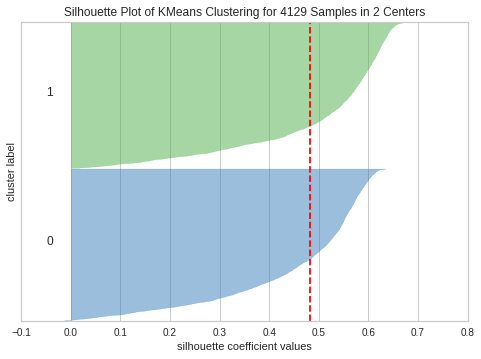

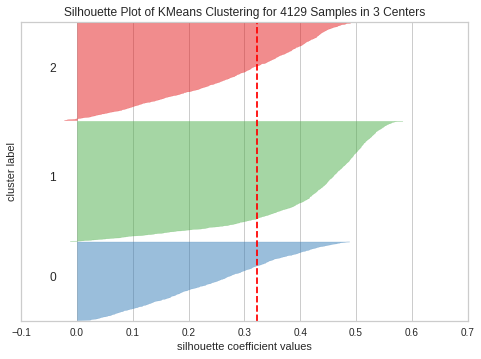

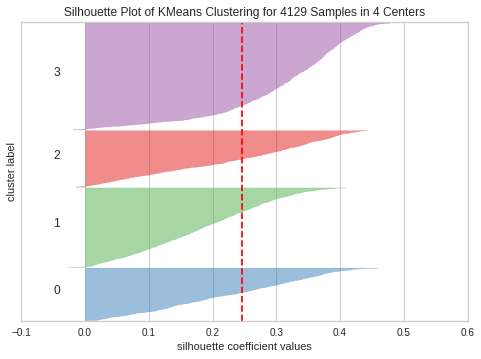

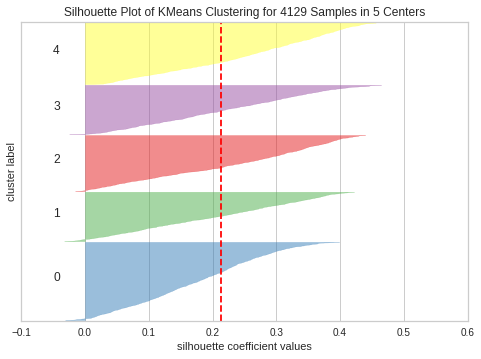

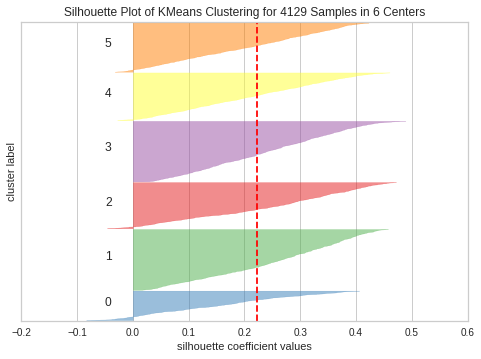

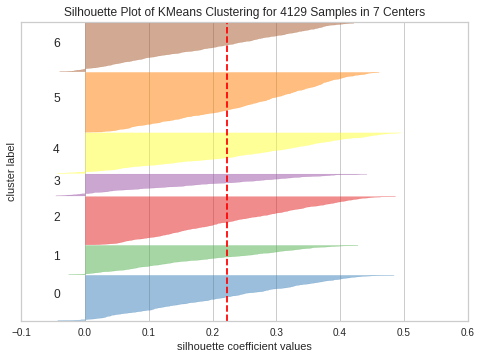

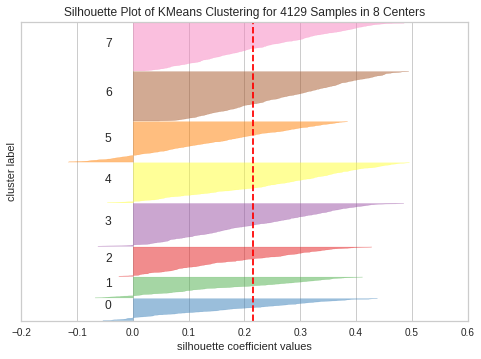

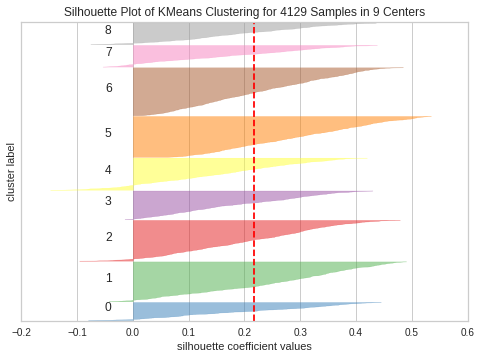

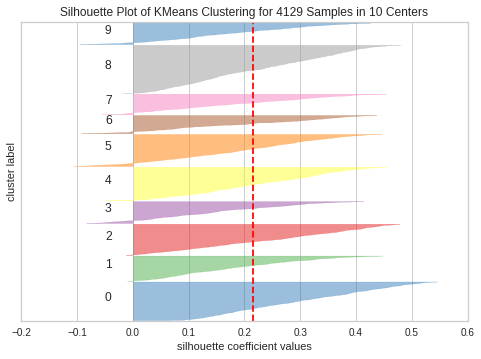

In [38]:
# k의 범위를 지정해주세요.
# [주의!] 최소 2개이상의 label/cluster가 있어야 합니다.
k_range = range(2,11)
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(train_df)
    visualizer.poof()

### 문제 14. Clustering : 판매자(메타데이터) - 최적의 k를 정하여 최종으로 K-Means 훈련시키기

In [39]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.
km_model = KMeans(n_clusters = 3)
km_model.fit(train_df)
pd.DataFrame(km_model.cluster_centers_, columns=train_df.columns)

bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
0      0.946281  0.989095           2.416353         1.579326   
1      0.632812  0.972095           2.411267         1.402781   
2      1.561750  1.184079           2.418585         1.264565   

   days_from_joined  years_from_joined  
0          0.512370           0.545937  
1          2.707074           2.724491  
2          4.356189           4.365181

### 문제 15. Clustering : 판매자(메타데이터) - 메타데이터로 Agglomerative 훈련시키기  
: 동일한 데이터로 Agglomerative 알고리즘을 훈련시켜봅니다.


In [40]:
from sklearn.cluster import AgglomerativeClustering
# Agglomerative의 파라미터 설정 시, linkage="ward", affinity="euclidean"로 설정해 보세요.
# n_clusters는 kmeans의 최적의 k를 참고하여 자유롭게 설정해보세요.
aggl = AgglomerativeClustering(n_clusters=4, linkage="ward", affinity="euclidean").fit(train_df)
aggl

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [41]:
# 훈련된 label을 변수에 저장하세요.
aggl_labels = aggl.labels_

# K-Means와 Agglomerative 알고리즘 결과에 차이가 있는지 시각화로 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("K-Means cluster","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=train_df["item_cnt"], 
               y=train_df["years_from_joined"], 
               mode="markers",
               marker=dict(color=km_model.labels_),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_df["item_cnt"], 
               y=train_df["years_from_joined"], 
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

### 문제 16. Clustering : 판매자(메타데이터) - 훈련된 모델에 test set을 사용해 predict 하기

In [42]:
# [문제 14]의 모델을 그대로 사용하여 prediction을 해보세요.
test_vendor_metadata_label_df = test_df.copy()
test_cluster = km_model.fit_predict(test_df)
test_vendor_metadata_label_df["label_from_km"] = test_cluster

In [43]:
# [문제 15]의 모델을 그대로 사용하여 prediction을 해보세요.
test_cluster = aggl.fit_predict(test_df)
test_vendor_metadata_label_df["label_from_aggl"] = test_cluster

In [44]:
# [문제 15]과 동일하게 그래프로 prediction결과를 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("K-means cluster-test", "Agglomerative cluster-test"))

fig.add_trace(
    go.Scatter(x=test_vendor_metadata_label_df["item_cnt"], 
               y=test_vendor_metadata_label_df["years_from_joined"], 
               mode="markers",
               marker=dict(color=test_vendor_metadata_label_df["label_from_km"]),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=test_vendor_metadata_label_df["item_cnt"], 
               y=test_vendor_metadata_label_df["years_from_joined"], 
               mode="markers",
               marker=dict(color=test_vendor_metadata_label_df["label_from_aggl"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

## Step3: Clustering - 판매자(공급) 컨설팅에 활용할 그룹으로 군집화 (거래데이터 활용)
: Step3에서는 판매자 거래데이터를 함께 사용합니다.   
: PCA를 통해 차원을 축소하고, HDBSCAN 모델을 훈련시키고 최적의 파라미터를 찾는 방법을 반복하여, 가장 적합한 모델로 훈련시킵니다.

### 문제 17. EDA : 판매자(거래데이터) - 변수간 상관관계 살펴보기

In [45]:
# 판매자 거래데이터를 살펴보세요. (vendor_stats_df)
vendor_stats_df.head(2)

vendor_id  weekly_order_cnt  monthly_order_cnt  total_order_cnt  \
0  19sJIV53qJApk91              1.71                6.0               12   
1  UChsuoA4cPkm4Uj              1.71                6.0               12   

   total_user_cnt      avg_cost  avg_delivery_cost  roas_growth_rate  \
0              11  24200.000000         916.666667          0.104453   
1               9  46916.666667           0.000000          0.095133   

   review_score  review_rate  review_reply_rate  
0          2.41         0.39               0.04  
1          1.09         0.45               0.13

In [46]:
corr_matrix = vendor_stats_df.corr()
corr_matrix

weekly_order_cnt  monthly_order_cnt  total_order_cnt  \
weekly_order_cnt           1.000000           0.992662         0.916604   
monthly_order_cnt          0.992662           1.000000         0.937016   
total_order_cnt            0.916604           0.937016         1.000000   
total_user_cnt             0.910951           0.930361         0.979115   
avg_cost                  -0.034530          -0.034132        -0.002231   
avg_delivery_cost         -0.100294          -0.087311         0.029267   
roas_growth_rate           0.126901           0.131289         0.117747   
review_score               0.099584           0.101787         0.088232   
review_rate                0.122862           0.128190         0.128882   
review_reply_rate          0.254062           0.264406         0.253386   

                   total_user_cnt  avg_cost  avg_delivery_cost  \
weekly_order_cnt         0.910951 -0.034530          -0.100294   
monthly_order_cnt        0.930361 -0.034132          -0.087311   
total_order_cnt          0.979115 -0.002231           0.029267   
total_user_cnt           1.000000 -0.008073           0.013124   
avg_cost                -0.008073  1.000000           0.347557   
avg_delivery_cost        0.013124  0.347557           1.000000   
roas_growth_rate         0.137139  0.003964          -0.015499   
review_score             0.099840  0.012409           0.004110   
review_rate              0.143133  0.010270           0.024460   
review_reply_rate        0.288209 -0.008317          -0.007112   

                   roas_growth_rate  review_score  review_rate  \
weekly_order_cnt           0.126901      0.099584     0.122862   
monthly_order_cnt          0.131289      0.101787     0.128190   
total_order_cnt            0.117747      0.088232     0.128882   
total_user_cnt             0.137139      0.099840     0.143133   
avg_cost                   0.003964      0.012409     0.010270   
avg_delivery_cost         -0.015499      0.004110     0.024460   
roas_growth_rate           1.000000      0.738310     0.020874   
review_score               0.738310      1.000000     0.133786   
review_rate                0.020874      0.133786     1.000000   
review_reply_rate          0.442410      0.096454     0.593493   

                   review_reply_rate  
weekly_order_cnt            0.254062  
monthly_order_cnt           0.264406  
total_order_cnt             0.253386  
total_user_cnt              0.288209  
avg_cost                   -0.008317  
avg_delivery_cost          -0.007112  
roas_growth_rate            0.442410  
review_score                0.096454  
review_rate                 0.593493  
review_reply_rate           1.000000

In [47]:
# 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.
"""
weekly_order_cnt	monthly_order_cnt	total_order_cnt	total_user_cnt는 상관관계가 높음.
avg_cost, avg_delivery_cost는 다른변수와의 상관관계가 높지 않음.
roas_growth_rate, review_score는 0.74
review_rate, review_reply_rate는 0.6
"""
corr_matrix[abs(corr_matrix)>=0.4]

weekly_order_cnt  monthly_order_cnt  total_order_cnt  \
weekly_order_cnt           1.000000           0.992662         0.916604   
monthly_order_cnt          0.992662           1.000000         0.937016   
total_order_cnt            0.916604           0.937016         1.000000   
total_user_cnt             0.910951           0.930361         0.979115   
avg_cost                        NaN                NaN              NaN   
avg_delivery_cost               NaN                NaN              NaN   
roas_growth_rate                NaN                NaN              NaN   
review_score                    NaN                NaN              NaN   
review_rate                     NaN                NaN              NaN   
review_reply_rate               NaN                NaN              NaN   

                   total_user_cnt  avg_cost  avg_delivery_cost  \
weekly_order_cnt         0.910951       NaN                NaN   
monthly_order_cnt        0.930361       NaN                NaN   
total_order_cnt          0.979115       NaN                NaN   
total_user_cnt           1.000000       NaN                NaN   
avg_cost                      NaN       1.0                NaN   
avg_delivery_cost             NaN       NaN                1.0   
roas_growth_rate              NaN       NaN                NaN   
review_score                  NaN       NaN                NaN   
review_rate                   NaN       NaN                NaN   
review_reply_rate             NaN       NaN                NaN   

                   roas_growth_rate  review_score  review_rate  \
weekly_order_cnt                NaN           NaN          NaN   
monthly_order_cnt               NaN           NaN          NaN   
total_order_cnt                 NaN           NaN          NaN   
total_user_cnt                  NaN           NaN          NaN   
avg_cost                        NaN           NaN          NaN   
avg_delivery_cost               NaN           NaN          NaN   
roas_growth_rate            1.00000       0.73831          NaN   
review_score                0.73831       1.00000          NaN   
review_rate                     NaN           NaN     1.000000   
review_reply_rate           0.44241           NaN     0.593493   

                   review_reply_rate  
weekly_order_cnt                 NaN  
monthly_order_cnt                NaN  
total_order_cnt                  NaN  
total_user_cnt                   NaN  
avg_cost                         NaN  
avg_delivery_cost                NaN  
roas_growth_rate            0.442410  
review_score                     NaN  
review_rate                 0.593493  
review_reply_rate           1.000000

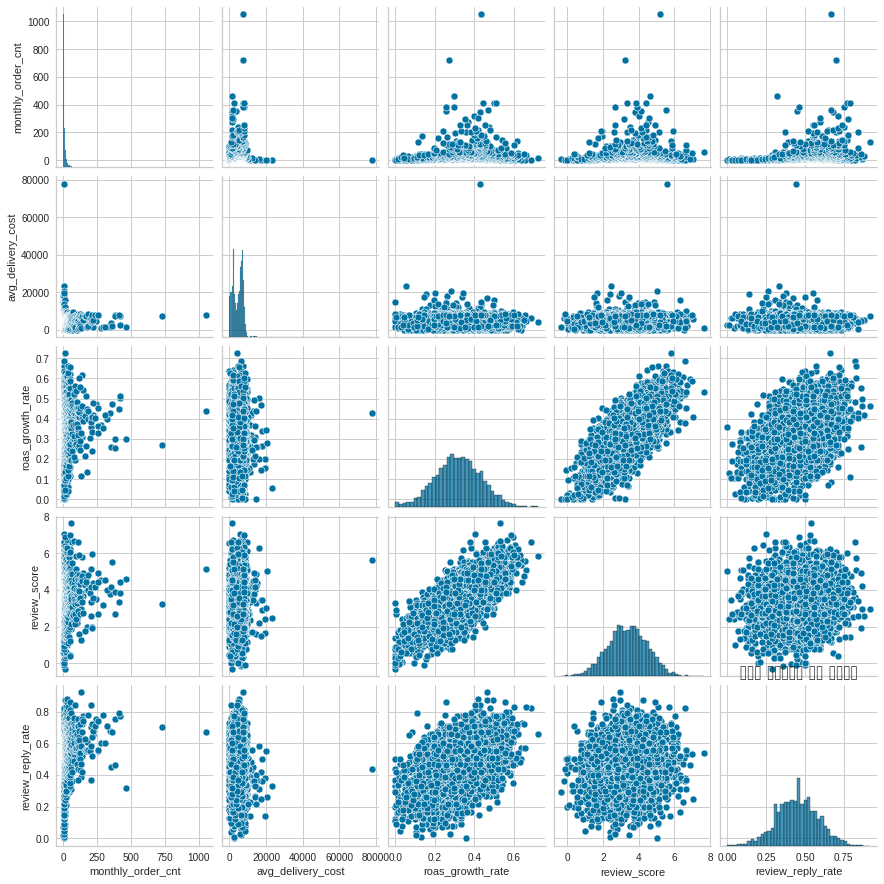

In [48]:
# 상관관계를 기반으로 변수를 선택해서 Scatter plot을 그려보세요.
# ["monthly_order_cnt", "avg_delivery_cost", "roas_growth_rate", "review_score", "review_reply_rate"]
"""
monthly_order_cnt, avg_delivery_cost, roas_growth_rate, review_score, review_reply_rate 사용
"""
sns.pairplot(vendor_stats_df[["monthly_order_cnt", "avg_delivery_cost", "roas_growth_rate", "review_score", "review_reply_rate"]])
plt.title("판매자 거래데이터 변수 상관관계", fontsize = 20)
plt.show()

### 문제 18. Clustering : 판매자(거래데이터) - HDBSCAN 모델 install & 정규화 적용하기
: HDBSCAN 모듈을 설치하고 판매자 거래데이터를 train&test set 으로 분리하세요.

In [49]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 6.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311703 sha256=cdf60c1d6e9d6535a08c38ae2fe0f5faea241fd098032d673c2562379b8c9c6e
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [50]:
# 거래 데이터의 컬럼과 모델 훈련에 필요한 컬럼을 선택해보세요.
# [참고] 수치화되지 않은 컬럼을 제외하세요.
vendor_stats_df.columns

Index(['vendor_id', 'weekly_order_cnt', 'monthly_order_cnt', 'total_order_cnt',
       'total_user_cnt', 'avg_cost', 'avg_delivery_cost', 'roas_growth_rate',
       'review_score', 'review_rate', 'review_reply_rate'],
      dtype='object')

In [51]:
# 선택한 컬럼으로 데이터셋을 나눠주세요.
"""
'vendor_id' 제외
"""
vendor_numerics_df = vendor_stats_df[['monthly_order_cnt', 'avg_cost', 'avg_delivery_cost', 'roas_growth_rate',
       'review_score', 'review_rate', 'review_reply_rate']]

In [52]:
mm_scaler = MinMaxScaler(feature_range=(0, 5))
scaled_vendor_stats = mm_scaler.fit_transform(vendor_numerics_df)
scaled_vendor_stats_df = pd.DataFrame(scaled_vendor_stats, columns=vendor_numerics_df.columns)
scaled_vendor_stats_df.head()

monthly_order_cnt  avg_cost  avg_delivery_cost  roas_growth_rate  \
0           0.023774  0.086391           0.058877          0.720692   
1           0.023774  0.195447           0.000000          0.656382   
2           0.002377  0.075229           0.473691          1.996456   
3           0.014264  0.074909           0.131135          1.223478   
4           0.006657  0.075830           0.112401          0.673268   

   review_score  review_rate  review_reply_rate  
0      1.706399     1.894737           0.217391  
1      0.878294     2.210526           0.706522  
2      2.509410     2.526316           1.195652  
3      1.888331     2.368421           0.326087  
4      0.897114     2.473684           1.413043

### 문제 19. Clustering : 판매자(거래데이터) - 데이터셋 분리하기
: 판매자 거래데이터를 train&test set 으로 분리하세요.

In [53]:
# 정규화시킨 데이터를 train/test set으로 9:1의 비율로 나눠보세요. (train_test_split)
train_df, test_df = train_test_split(scaled_vendor_stats_df, test_size=0.1)
print(len(train_df), len(test_df))

4129 459


In [54]:
# 결과 라벨을 저장하기 위한 dataframe을 생성합니다.
hdb_data_df = train_df.copy()

### 문제 20. Clustering : 판매자(거래데이터) - HDBSCAN 모델 파라미터 탐색하기
: 판매자 거래데이터의 clustering을 위해 HDBSCAN 모듈을 훈련시키고 파라미터를 탐색해보세요.

In [55]:
# hdbscan 모듈을 import 합니다.
import hdbscan

In [56]:
# min_samples 파라미터를 비교하는 함수를 사용해보세요.
# [참고] min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="avg_delivery_cost" 로 설정해주세요. 

def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="avg_delivery_cost"):
  for ms in ms_list: 
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=ms, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세확인. (outlier=클러스터명이 -1인 경우)
    hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화하기.
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
    fig.show()

    # 군집별 데이터 분포 확인.
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hdb_cluster_df["point_cnt"] = data_df[label_name].value_counts()
    print(hdb_cluster_df)
  return data_df

In [57]:
# 만든 함수로 파라미터를 비교해보세요. (min_cluster_size=5)
"""
# min_samples 숫자가 커질수록 보수적인 방법입니다. (=outlier로 판단되는 데이터가 증가합니다.)
[10, 20, 30, 50] >> [1, 3, 5, 10] 
x="total_order_cnt", y="avg_cost"
x="total_cost", y="avg_cost"
"""
ms_list = [1, 3, 5, 10]

hdb_data_df = opt_hdbscan(train_df, ms_list, hdb_data_df, min_cluster_size=5, label_name="hdbscan_label", x_col="monthly_order_cnt" , y_col="avg_delivery_cost")


               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.330545  0.270257           0.384763   
0                       0.011982  0.089514           0.319751   
1                       0.009605  0.137615           0.331851   
2                       0.023803  0.103100           0.198102   
3                       0.049067  0.134610           0.292740   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.328558      2.463977     2.961067           2.582887   
0                      0.589902      0.635419     1.180451           1.125776   
1                      1.071658      1.707445     1.280702           0.434783   
2                      1.967620      2.577164     1.452632           0.543478   
3                      2.199385      2.323435     2.854154

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.370948  0.312843           0.423899   
0                       0.007061  0.116914           0.354790   
1                       0.051855  0.135002           0.292557   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.188967      2.276606     2.930162           2.596851   
0                      0.461710      0.671267     1.228070           1.050725   
1                      2.204716      2.331944     2.852427           2.448433   

               point_cnt  
hdbscan_label             
-1                   156  
0                      6  
1                   3967  


               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.091758  0.159892           0.308453   
0                       0.025973  0.159205           0.455348   
1                       0.054268  0.119858           0.227693   
2                       0.039084  0.093892           0.364587   
3                       0.040115  0.126185           0.287773   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.238104      2.345208     2.862043           2.489062   
0                      3.539220      3.191656     2.302632           2.486413   
1                      2.278365      1.266207     2.035088           2.581522   
2                      3.242349      2.721455     3.673684           3.750000   
3                      2.162858      2.311057     2.847602

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.075005  0.148463           0.301437   
0                       0.020057  0.099669           0.277558   
1                       0.036561  0.125225           0.288276   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.219229      2.339961     2.853357           2.460921   
0                      1.391463      2.047261     2.412281           1.304348   
1                      2.162195      2.297992     2.854356           2.435833   

               point_cnt  
hdbscan_label             
-1                  2933  
0                      6  
1                   1190  


### 문제 21. Clustering : 판매자 - 메타데이터와 거래데이터 합치기
: 판매자 메타데이터와 거래데이터를 합쳐서 군집화 모델을 훈련시켜보세요.

In [58]:
# Step2에서 사용한 판매자 메타데이터에 거래데이터를 join시켜보세요. 
# [참고] set_index()를 사용해 index를 기준으로 join해보세요.
vendor_df = vendor_metadata_df.set_index("vendor_id").join(vendor_stats_df.set_index("vendor_id"), how="left").reset_index()


In [59]:
# join된 데이터를 확인해보세요.
vendor_df.head(2)

vendor_id  if_affiliation joined_date  bookmark_cnt  item_cnt  \
0  19sJIV53qJApk91               0  2019-10-23            74       126   
1  UChsuoA4cPkm4Uj               0  2019-10-27          1592       114   

   base_shipping_fee  commission_rate  days_from_joined  years_from_joined  \
0             2000.0             0.22               436                1.2   
1             1600.0             0.25               432                1.2   

   weekly_order_cnt  monthly_order_cnt  total_order_cnt  total_user_cnt  \
0              1.71                6.0               12              11   
1              1.71                6.0               12               9   

       avg_cost  avg_delivery_cost  roas_growth_rate  review_score  \
0  24200.000000         916.666667          0.104453          2.41   
1  46916.666667           0.000000          0.095133          1.09   

   review_rate  review_reply_rate  
0         0.39               0.04  
1         0.45               0.13

In [60]:
# 판매자 데이터에서 군집분석을 위한 숫자 형태의 변수만 남겨보세요.
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
vendor_df = vendor_df.select_dtypes(include=numerics_types)

In [61]:
# binary변수를 제거하세요.
# [참고] np.isin()을 활용해보세요.
vendor_numerics_cols = [col for col in vendor_df if np.isin(vendor_df[col].unique(), [0, 1]).all()]
vendor_df = vendor_df.drop(vendor_numerics_cols, axis=1)
vendor_df.head(2)

bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
0            74       126             2000.0             0.22   
1          1592       114             1600.0             0.25   

   days_from_joined  years_from_joined  weekly_order_cnt  monthly_order_cnt  \
0               436                1.2              1.71                6.0   
1               432                1.2              1.71                6.0   

   total_order_cnt  total_user_cnt      avg_cost  avg_delivery_cost  \
0               12              11  24200.000000         916.666667   
1               12               9  46916.666667           0.000000   

   roas_growth_rate  review_score  review_rate  review_reply_rate  
0          0.104453          2.41         0.39               0.04  
1          0.095133          1.09         0.45               0.13

### 문제 22. EDA : 판매자 - 변수간 상관관계 살펴보기

In [62]:
# 전체 변수간의 상관관계를 확인 해보세요.
corr_matrix = vendor_df.corr()
corr_matrix

bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
bookmark_cnt           1.000000  0.008374          -0.003479        -0.038308   
item_cnt               0.008374  1.000000           0.231289         0.021084   
base_shipping_fee     -0.003479  0.231289           1.000000         0.451113   
commission_rate       -0.038308  0.021084           0.451113         1.000000   
days_from_joined       0.278736  0.102564           0.000226        -0.159884   
years_from_joined      0.279422  0.102676           0.000068        -0.160044   
weekly_order_cnt       0.072095  0.008679          -0.012643         0.012362   
monthly_order_cnt      0.077554  0.009463          -0.011599         0.009663   
total_order_cnt        0.087223  0.020910          -0.016639        -0.018601   
total_user_cnt         0.084376  0.013952          -0.012127        -0.017540   
avg_cost               0.041657  0.026073          -0.011963        -0.043063   
avg_delivery_cost      0.111470  0.067542          -0.007464        -0.122915   
roas_growth_rate       0.005495 -0.002205           0.021662         0.004651   
review_score           0.020923 -0.003903          -0.000108        -0.002336   
review_rate           -0.005973  0.002345          -0.009305        -0.013590   
review_reply_rate      0.000093  0.001733           0.026350        -0.006923   

                   days_from_joined  years_from_joined  weekly_order_cnt  \
bookmark_cnt               0.278736           0.279422          0.072095   
item_cnt                   0.102564           0.102676          0.008679   
base_shipping_fee          0.000226           0.000068         -0.012643   
commission_rate           -0.159884          -0.160044          0.012362   
days_from_joined           1.000000           0.999897         -0.016804   
years_from_joined          0.999897           1.000000         -0.016461   
weekly_order_cnt          -0.016804          -0.016461          1.000000   
monthly_order_cnt          0.007704           0.007985          0.992662   
total_order_cnt            0.147791           0.147926          0.916604   
total_user_cnt             0.149763           0.149865          0.910951   
avg_cost                   0.191498           0.191253         -0.034530   
avg_delivery_cost          0.666056           0.665834         -0.100294   
roas_growth_rate           0.039959           0.039706          0.126901   
review_score               0.034414           0.034071          0.099584   
review_rate                0.063356           0.063541          0.122862   
review_reply_rate          0.105253           0.105533          0.254062   

                   monthly_order_cnt  total_order_cnt  total_user_cnt  \
bookmark_cnt                0.077554         0.087223        0.084376   
item_cnt                    0.009463         0.020910        0.013952   
base_shipping_fee          -0.011599        -0.016639       -0.012127   
commission_rate             0.009663        -0.018601       -0.017540   
days_from_joined            0.007704         0.147791        0.149763   
years_from_joined           0.007985         0.147926        0.149865   
weekly_order_cnt            0.992662         0.916604        0.910951   
monthly_order_cnt           1.000000         0.937016        0.930361   
total_order_cnt             0.937016         1.000000        0.979115   
total_user_cnt              0.930361         0.979115        1.000000   
avg_cost                   -0.034132        -0.002231       -0.008073   
avg_delivery_cost          -0.087311         0.029267        0.013124   
roas_growth_rate            0.131289         0.117747        0.137139   
review_score                0.101787         0.088232        0.099840   
review_rate                 0.128190         0.128882        0.143133   
review_reply_rate           0.264406         0.253386        0.288209   

                   avg_cost  avg_delivery_cost  roas_growth_rate  \
bookmark_cnt       0.041657           

In [63]:
# 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.
corr_matrix[abs(corr_matrix)>=0.4]

bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
bookmark_cnt                1.0       NaN                NaN              NaN   
item_cnt                    NaN       1.0                NaN              NaN   
base_shipping_fee           NaN       NaN           1.000000         0.451113   
commission_rate             NaN       NaN           0.451113         1.000000   
days_from_joined            NaN       NaN                NaN              NaN   
years_from_joined           NaN       NaN                NaN              NaN   
weekly_order_cnt            NaN       NaN                NaN              NaN   
monthly_order_cnt           NaN       NaN                NaN              NaN   
total_order_cnt             NaN       NaN                NaN              NaN   
total_user_cnt              NaN       NaN                NaN              NaN   
avg_cost                    NaN       NaN                NaN              NaN   
avg_delivery_cost           NaN       NaN                NaN              NaN   
roas_growth_rate            NaN       NaN                NaN              NaN   
review_score                NaN       NaN                NaN              NaN   
review_rate                 NaN       NaN                NaN              NaN   
review_reply_rate           NaN       NaN                NaN              NaN   

                   days_from_joined  years_from_joined  weekly_order_cnt  \
bookmark_cnt                    NaN                NaN               NaN   
item_cnt                        NaN                NaN               NaN   
base_shipping_fee               NaN                NaN               NaN   
commission_rate                 NaN                NaN               NaN   
days_from_joined           1.000000           0.999897               NaN   
years_from_joined          0.999897           1.000000               NaN   
weekly_order_cnt                NaN                NaN          1.000000   
monthly_order_cnt               NaN                NaN          0.992662   
total_order_cnt                 NaN                NaN          0.916604   
total_user_cnt                  NaN                NaN          0.910951   
avg_cost                        NaN                NaN               NaN   
avg_delivery_cost          0.666056           0.665834               NaN   
roas_growth_rate                NaN                NaN               NaN   
review_score                    NaN                NaN               NaN   
review_rate                     NaN                NaN               NaN   
review_reply_rate               NaN                NaN               NaN   

                   monthly_order_cnt  total_order_cnt  total_user_cnt  \
bookmark_cnt                     NaN              NaN             NaN   
item_cnt                         NaN              NaN             NaN   
base_shipping_fee                NaN              NaN             NaN   
commission_rate                  NaN              NaN             NaN   
days_from_joined                 NaN              NaN             NaN   
years_from_joined                NaN              NaN             NaN   
weekly_order_cnt            0.992662         0.916604        0.910951   
monthly_order_cnt           1.000000         0.937016        0.930361   
total_order_cnt             0.937016         1.000000        0.979115   
total_user_cnt              0.930361         0.979115        1.000000   
avg_cost                         NaN              NaN             NaN   
avg_delivery_cost                NaN              NaN             NaN   
roas_growth_rate                 NaN              NaN             NaN   
review_score                     NaN              NaN             NaN   
review_rate                      NaN              NaN             NaN   
review_reply_rate                NaN              NaN             NaN   

                   avg_cost  avg_delivery_cost  roas_growth_rate  \
bookmark_cnt            NaN           

### 문제 23. Clustering : 판매자 - Normalization(정규화) 적용하기

In [64]:
# 정규화에 사용되는 모듈 import.
from sklearn.preprocessing import StandardScaler

In [65]:
# StandardScaler를 사용하여 [문제 21]에서 정제한 데이터를 정규화 시켜보세요.
scaled_vendor_trans = StandardScaler().fit_transform(vendor_df)
scaled_vendor_trans_df = pd.DataFrame(scaled_vendor_trans, columns=vendor_df.columns)
scaled_vendor_trans_df.head()

bookmark_cnt  item_cnt  base_shipping_fee  commission_rate  \
0     -1.205485  0.508887          -0.189569        -0.048359   
1      0.756105  0.337365          -0.999951         0.171898   
2     -1.177056 -1.149161          -0.999951        -1.369907   
3     -0.875969 -1.006226          -0.392164        -0.855972   
4      0.849145 -0.606007          -1.607737        -1.076230   

   days_from_joined  years_from_joined  weekly_order_cnt  monthly_order_cnt  \
0         -1.298231          -1.293903         -0.292844          -0.239669   
1         -1.303858          -1.293903         -0.292844          -0.239669   
2          0.204319           0.194103         -0.364459          -0.371552   
3         -1.073130          -1.088660         -0.195954          -0.298284   
4         -0.988717          -0.986039         -0.292844          -0.345176   

   total_order_cnt  total_user_cnt  avg_cost  avg_delivery_cost  \
0        -0.253841       -0.302303 -0.367635          -1.284790   
1        -0.253841       -0.309184  0.364795          -1.600810   
2        -0.253841       -0.309184 -0.442597           0.941715   
3        -0.253841       -0.309184 -0.444747          -0.896947   
4        -0.253841       -0.309184 -0.438567          -0.997499   

   roas_growth_rate  review_score  review_rate  review_reply_rate  
0         -1.875444     -0.885334    -1.495724          -3.075268  
1         -1.957080     -2.076463    -1.001435          -2.401470  
2         -0.255949      0.269700    -0.507146          -1.727672  
3         -1.237192     -0.623647    -0.754290          -2.925535  
4         -1.935645     -2.049392    -0.589527          -1.428206

### 문제 24. Clustering : 판매자 - PCA(Principal Components Analysis)를 통해 차원 축소하기
: PCA를 적용하여 변수의 차원을 축소 시켜보세요.

Principal Components Analysis (주성분 분석) : 

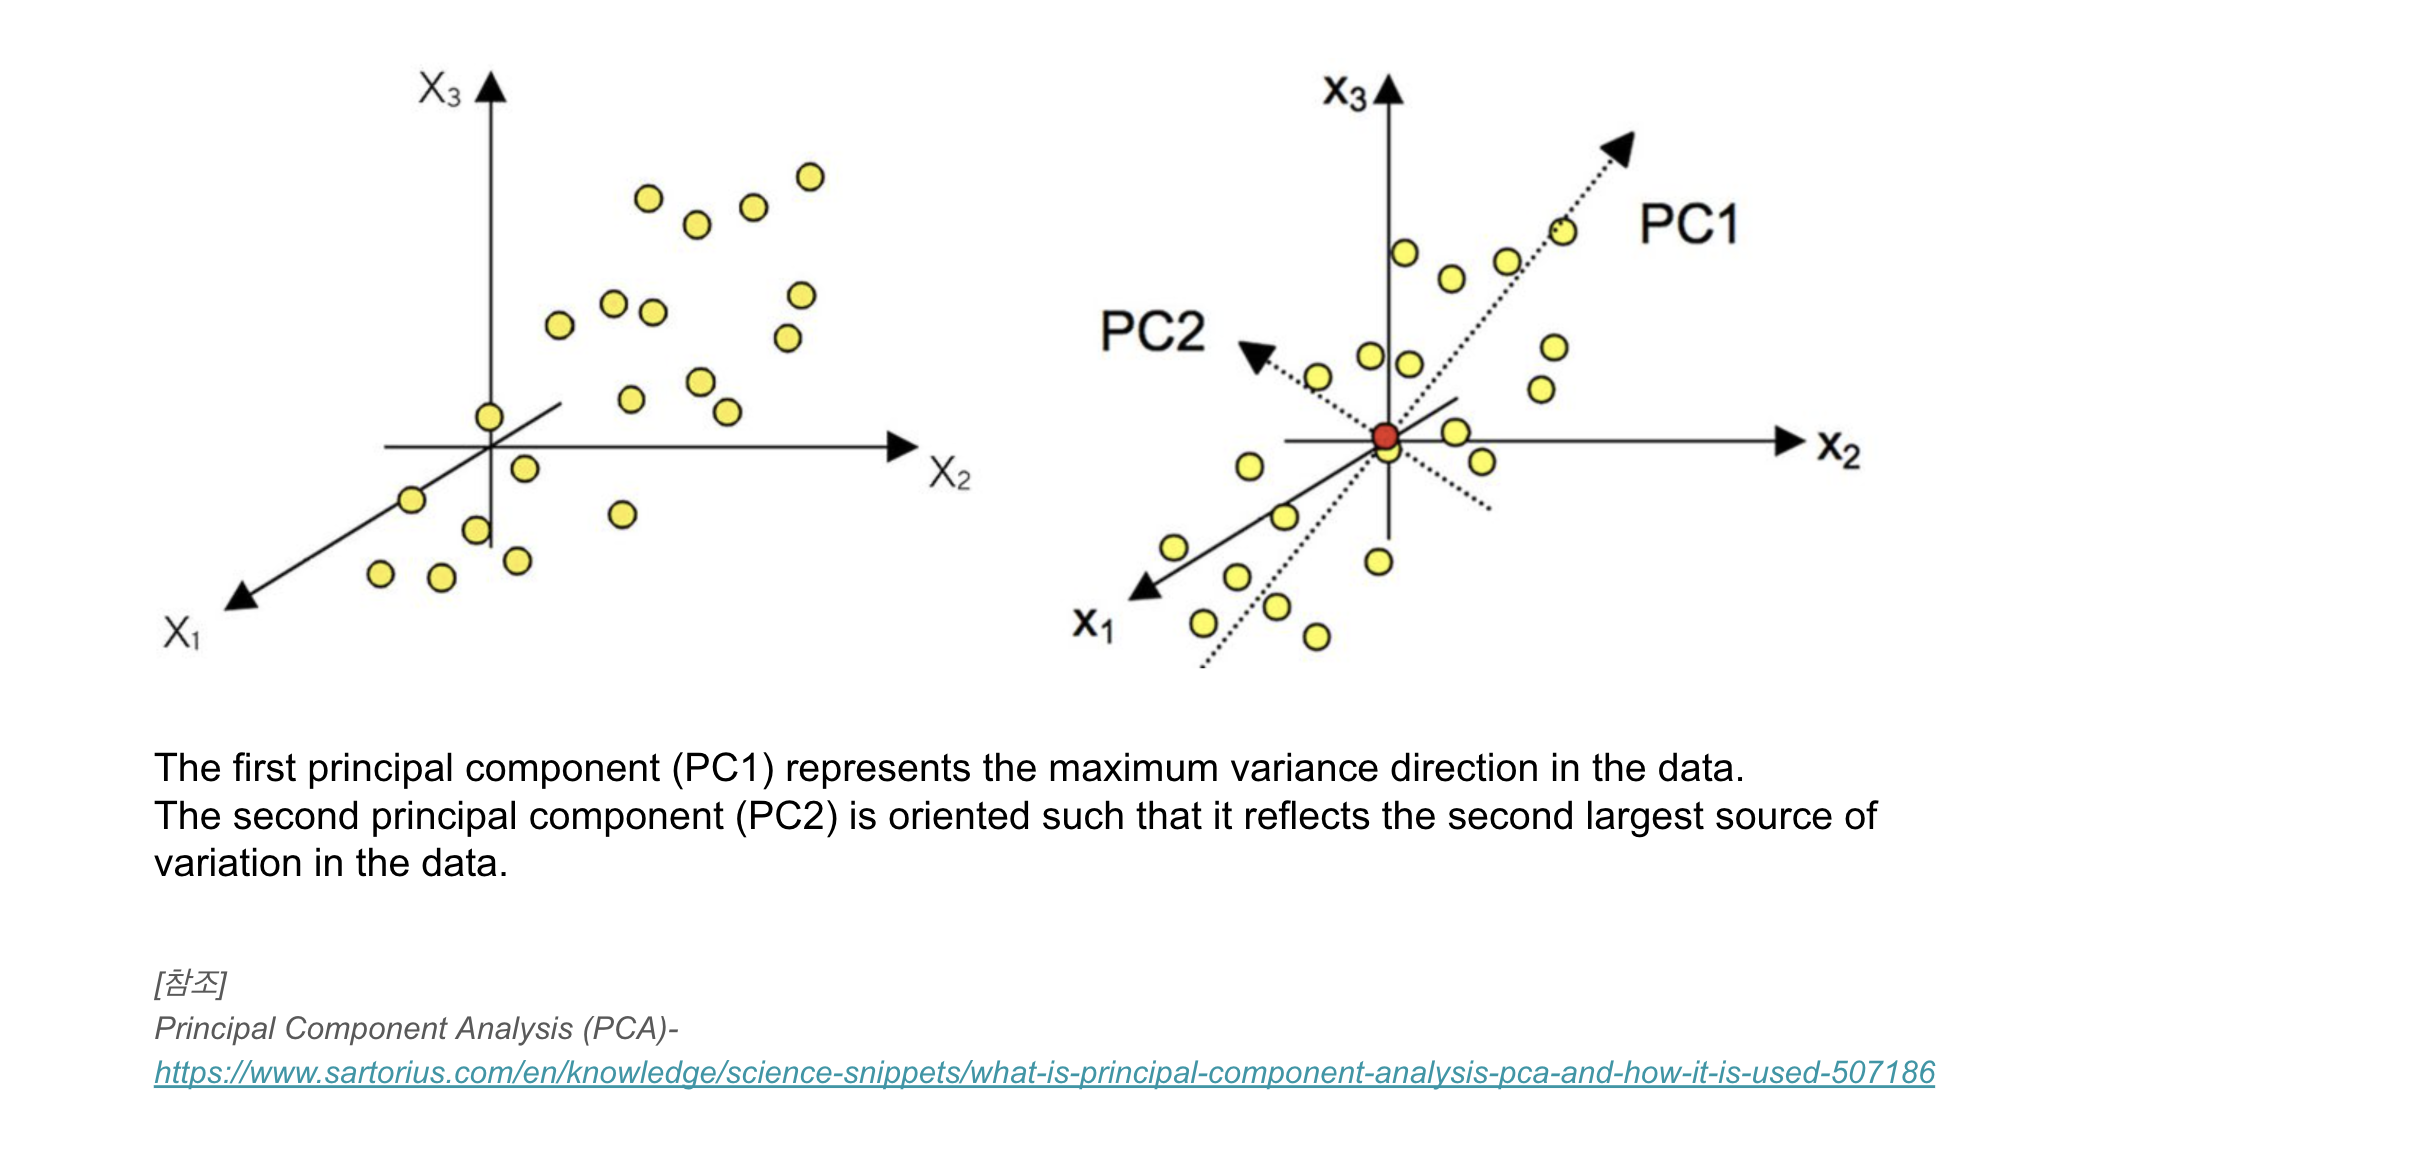


*PCA 모듈 상세보기 >> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 


In [66]:
# PCA를 위한 모듈 Import 하기.
from sklearn.decomposition import PCA


In [67]:
# PCA모듈을 사용해서 [문제22]의 판매자 데이터를 훈련시켜보세요.
# [참고] 그래프를 그리기 위해서는 축소할 차원수를 지정하지 않습니다.
pca = PCA()
pca.fit(scaled_vendor_trans_df)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
# 그래프를 통해서 적당한 principal components 수를 찾아보세요.
fig = px.line(x=range(scaled_vendor_trans_df.shape[1]), 
              y=pca.explained_variance_ratio_.cumsum(), 
              labels={"x":"principal components", "y":"explained variance"})
fig.update_layout(width=800, height=500)
fig.show()

In [69]:
# 위 그래프를 통해 정한 principal components수로 데이터 차원을 축소해보세요.
pca = PCA(n_components=6)
vendor_pca_components = pca.fit_transform(scaled_vendor_trans_df)
vendor_pca_df = pd.DataFrame(data = vendor_pca_components)

In [70]:
# 차원이 축소된 데이터를 확인해보세요.
vendor_pca_df.head(5)

0         1         2         3         4         5
0 -2.105733 -2.377088  2.950478 -0.021273  1.293028  0.624562
1 -1.906573 -1.996507  3.389698 -0.441012  0.356183 -0.211993
2 -1.056639  0.552012  0.765545 -1.907617  1.022623  0.583764
3 -1.776161 -1.866995  2.239463 -1.224083  1.088274  0.322558
4 -1.591236 -1.343501  2.962410 -1.944974 -0.399380 -0.857580

In [71]:
# 주성분 변수명을 할당해주세요.
vendor_pca_df.columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"]
vendor_pca_df.head(2)

pc1       pc2       pc3       pc4       pc5       pc6
0 -2.105733 -2.377088  2.950478 -0.021273  1.293028  0.624562
1 -1.906573 -1.996507  3.389698 -0.441012  0.356183 -0.211993

### 문제 25. Clustering : 판매자 - PCA를 통해 생성된 주성분 살펴보기

In [72]:
# Heatmap 시각화를 통해 주성분과 기존의 변수간의 관계를 살펴보세요.
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=pca.components_,
                   x=list(scaled_vendor_trans_df.columns),
                   y=list(vendor_pca_df.columns),
                   hoverongaps = False))
fig.update_layout(height=500, width=1000)
fig.show()

### 문제 26. Clustering : 판매자 - train/test set 분리하기

In [73]:
# 차원축소된 데이터를 train/test set으로 9:1의 비율로 나눠보세요. (train_test_split)
train_df, test_df = train_test_split(vendor_pca_df, test_size=0.1)
print(len(train_df), len(test_df))

4129 459


In [74]:
km_data_df = train_df.copy()

### 문제 27. Clustering : 판매자 - 차원 축소된 데이터로 최적의 k 찾기

In [75]:
!pip install kneed

In [76]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾아보세요.
from kneed import KneeLocator

"""
[KneeLocator parameter 참고]
curve (str) – If ‘concave’, algorithm will detect knees. If ‘convex’, it will detect elbows.
direction (str) – one of {“increasing”, “decreasing”}
"""
distortions = [] 
k_range = range(1,11)
for i in k_range:
    km = KMeans(n_clusters = i, random_state=42)
    km.fit(train_df)
    distortions.append(km.inertia_)

print(distortions)

kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

[47634.10813285889, 38778.191219944594, 30683.260773415732, 27186.197250339366, 25045.97406833842, 22954.244419459796, 21103.127504274686, 19894.392200632672, 18887.56779730582, 18022.707029706802]
최적의 k : 4
최적의 k의 y값 : 27186.197


### 문제 28. Clustering : 판매자 - 최적의 k로 K-Means 훈련시키기

In [77]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.
km = KMeans(n_clusters = 4)
km.fit(train_df)
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)

pc1       pc2       pc3       pc4       pc5       pc6
0  -0.516984  1.447859  0.855387  0.097551  0.087915 -0.060902
1  -0.528572 -1.640539  0.080973 -0.054780  0.064526  0.024106
2  15.217585 -1.498960  2.944732  0.124732  0.784771  0.372962
3   0.901607  0.833562 -1.205947 -0.025797 -0.226982 -0.043693

In [78]:
# 각 군집별 데이터 수도 확인해보세요.
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 1293], [1, 1690], [2, 33], [3, 1113]]

In [79]:
# 훈련된 라벨을 저장해주세요.
km_data_df["label_from_km"] = km.labels_


In [80]:
# 훈련결과를 시각화로 확인해보세요.
# [참고] PCA의 첫번째 주성분부터 사용하면 차이를 더 확실히 확인할 수 있습니다.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means PCA cluster"))

fig.add_trace(
    go.Scatter(x=km_data_df["pc1"], 
               y=km_data_df["pc2"], 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=km_data_df["pc1"], 
               y=km_data_df["pc2"], 
               mode="markers",
               marker=dict(color=km_data_df["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [81]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=km_data_df["pc1"], 
                                   y=km_data_df["pc2"], 
                                   z=km_data_df["pc3"],
                                   mode='markers',
                                   marker=dict(
                                        size=5,
                                        color=km_data_df["label_from_km"],
                                        opacity=0.8
                                    )
                                   )])
fig.show()

### 문제 29. Clustering : 판매자 - 훈련된 모델에 test set을 사용해 predict 하기

In [82]:
# [문제 14]의 모델을 그대로 사용하여 prediction을 해보세요.
test_vendor_label_df = test_df.copy()
test_cluster = km_model.fit_predict(test_df)
test_vendor_label_df["label_from_km"] = test_cluster

In [83]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=test_vendor_label_df["pc1"], 
                                   y=test_vendor_label_df["pc2"], 
                                   z=test_vendor_label_df["pc3"],
                                   mode='markers',
                                   marker=dict(
                                        size=5,
                                        color=test_vendor_label_df["label_from_km"],
                                        opacity=0.8
                                    )
                                   )])
fig.show()

## Step4: 활용사례 - 그룹화된 고객과 판매자를 활용하여 만든 추천시스템
: Chapter2에서 배운 고객 군집화와 Chapter3에서 배운 판매자 군집화를 활용한 간단한 추천 시스템을 만들어봅니다.

### Recommender System (추천시스템) 맛보기
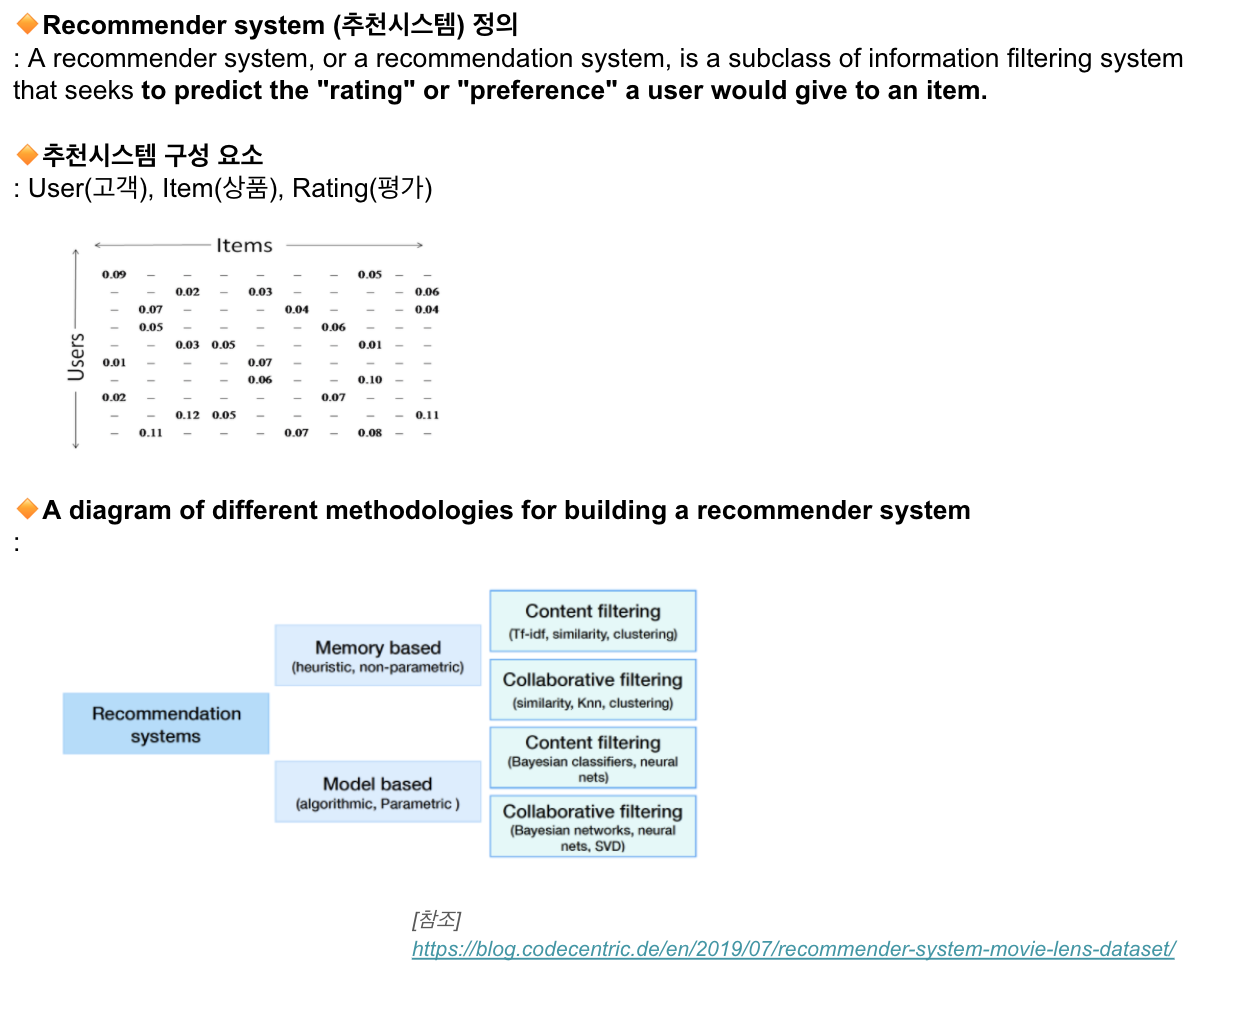

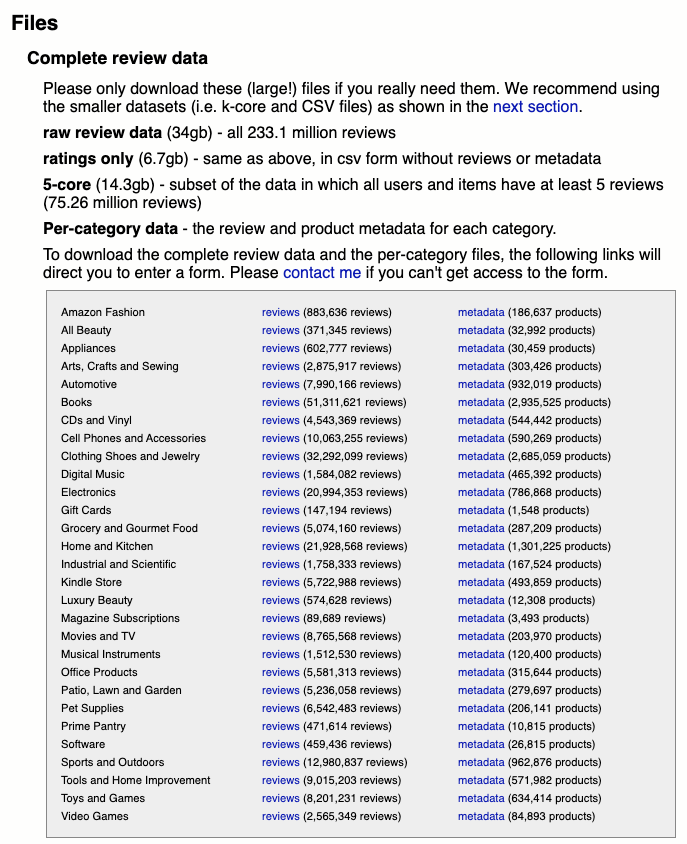

### 문제 30. 추천시스템에서 사용할 데이터 불러오기  
: user별 item의 '평균' rating을 담고있는 데이터 입니다.

In [84]:
# 데이터 url.
review_data_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/review_data.csv"

# 위의 url를 사용해서 각각의 DataFrame을 생성해보세요.
review_df = pd.read_csv(review_data_with_labels_url, parse_dates=[0])

In [85]:
review_df.head()

user             item  item_group  rating
0  8EzOblo9t562yOY  vgfAkNkq0qlFOhh           3     5.0
1  lJkfoUeURQwRQzX  vgfAkNkq0qlFOhh           3     5.0
2  JmYADnKKqtJ0GYi  vgfAkNkq0qlFOhh           3     5.0
3  YehuD30VL5pIcer  6Ay7eqTEAoIlzLg          13     4.0
4  In5agUcBmfm9Ut4  6Ay7eqTEAoIlzLg          13     5.0

### 문제 31. 추천시스템에서 사용할 리뷰데이터 탐색하기

In [86]:
# user, item의 수를 확인하세요.
review_df.user.nunique(), review_df.item.nunique()

(1156, 25032)

In [87]:
# item group의 수를 확인하세요.
review_df.item_group.nunique()

49

In [88]:
# item group별 item수를 확인하세요.
review_df.groupby("item_group").count()[["item"]]

item
item_group      
0           2532
1           1452
2           1471
3           2007
4            652
5           1555
6           1365
7           1567
8            976
9           2166
10          1879
11          1689
12          1358
13          2094
14          1198
15          1185
16          1323
17           916
18           948
19          1290
20           578
21          1680
22           340
23          1123
24           625
25           504
26          1006
27           918
28          1609
29          1630
30           877
31          1150
32           292
33           560
34          1131
35           268
36           590
37           520
38          1254
39          1033
40          1081
41           435
42           790
43           952
44          1910
45            75
46          1100
47          1880
48           310

In [89]:
# rating 분포를 확인하세요.
fig = px.histogram(review_df, x="rating")
fig.update_layout(height=500, width=700)
fig.show()

### 문제 32. 리뷰데이터의 item_group 기준으로 평균 rating 구하기

In [90]:
# item기준의 리뷰데이터를 item_group기준의 rating으로 변환해줍니다.
review_by_group_df = review_df.groupby(["user", "item_group"])[["rating"]].mean().reset_index()
review_by_group_df.head(5)

user  item_group    rating
0  023s6EPaKsQfXqE          18  4.000000
1  023s6EPaKsQfXqE          25  5.000000
2  03Opy95xbHus7pi           2  4.750000
3  03Opy95xbHus7pi           3  4.333333
4  03Opy95xbHus7pi           4  4.000000

In [91]:
# rating 분포를 확인하세요.
fig = px.histogram(review_by_group_df, x="rating")
fig.update_layout(height=500, width=700)
fig.show()

### 문제 33. 추천시스템을 위한 surprise 모듈 import하기 
모듈 상세페이지 : https://surprise.readthedocs.io/en/stable/

In [92]:
!pip install scikit-surprise

In [93]:
# 필요한 모듈을 import 해주세요.
from surprise import Dataset, Reader
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV


### 문제 34. surprise 모듈에서 사용할 수 있도록 DataFrame 변형하기


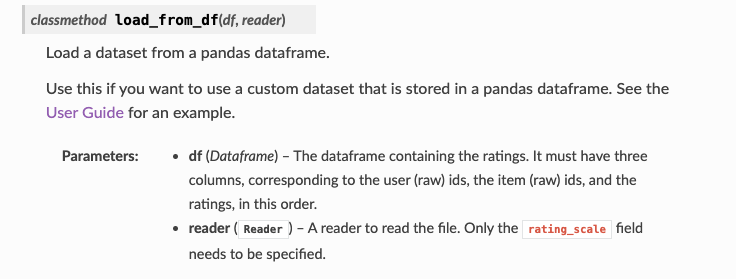

In [94]:
# surprise 모듈에서 인식할수있는 데이터 형태로 변형해주세요. 
# [참고] Dataset.load_from_df() 를 사용합니다.
# The columns must correspond to user id, item id and ratings (in that order).

reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(review_by_group_df, reader)
train_data.raw_ratings[:10]

[('023s6EPaKsQfXqE', 18, 4.0, None),
 ('023s6EPaKsQfXqE', 25, 5.0, None),
 ('03Opy95xbHus7pi', 2, 4.75, None),
 ('03Opy95xbHus7pi', 3, 4.333333333333333, None),
 ('03Opy95xbHus7pi', 4, 4.0, None),
 ('03Opy95xbHus7pi', 7, 3.6666666666666665, None),
 ('03Opy95xbHus7pi', 8, 4.5, None),
 ('03Opy95xbHus7pi', 9, 4.0, None),
 ('03Opy95xbHus7pi', 10, 4.612903225806452, None),
 ('03Opy95xbHus7pi', 14, 4.0, None)]

### 문제 35. surprise 모듈로 KNN 최적의 파라미터 찾기


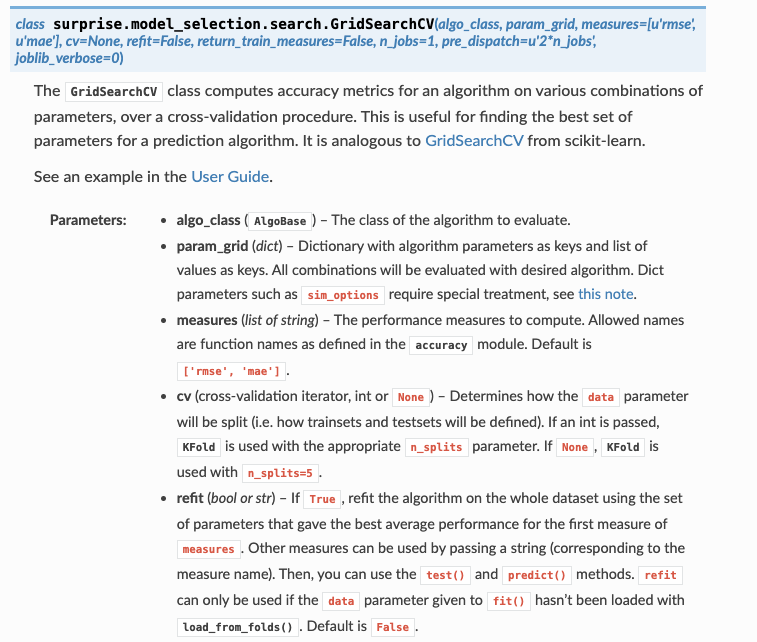

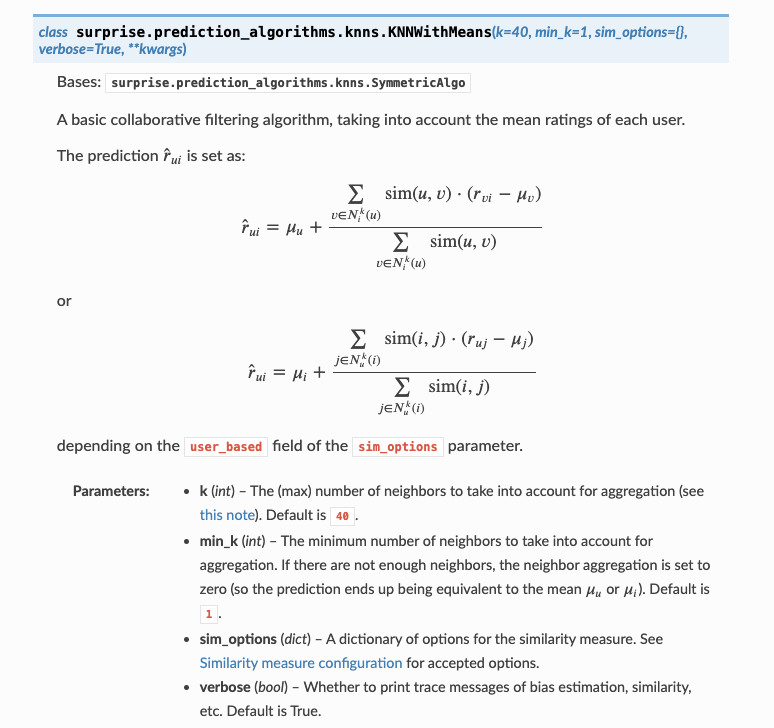

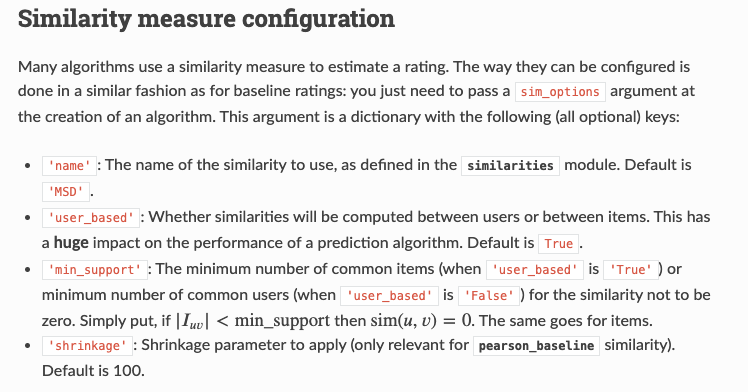

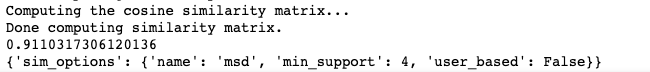

In [95]:
# Grid Search로 비교할 파라미터를 설정하고 최적의 파라미터를 찾아보세요.
# sim_options = {
#     "name": ["cosine", "msd"],
#     "min_support": [3, 4, 5],
#     "user_based": [False, True],
# }
sim_options = {
    "name": ["msd"],
    "min_support": [4, 5],
    "user_based": [False],
}
param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(train_data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9551265624669346
{'sim_options': {'name': 'msd', 'min_support': 4, 'user_based': False}}


In [96]:
# Grid Search의 결과를 DataFrame으로 확인해보세요.
pd.DataFrame(gs.cv_results)

split0_test_rmse  split1_test_rmse  split2_test_rmse  mean_test_rmse  \
0          0.945838          0.961177          0.958365        0.955127   
1          0.945685          0.961244          0.958838        0.955256   

   std_test_rmse  rank_test_rmse  split0_test_mae  split1_test_mae  \
0       0.006668               1         0.687585         0.694828   
1       0.006838               2         0.687591         0.695122   

   split2_test_mae  mean_test_mae  std_test_mae  rank_test_mae  mean_fit_time  \
0         0.692050       0.691488      0.002983              1       0.005692   
1         0.692517       0.691743      0.003123              2       0.006149   

   std_fit_time  mean_test_time  std_test_time  \
0      0.000555        0.135551       0.004571   
1      0.000105        0.135568       0.008103   

                                              params  \
0  {'sim_options': {'name': 'msd', 'min_support':...   
1  {'sim_options': {'name': 'msd', 'min_support':...   

                                   param_sim_options  
0  {'name': 'msd', 'min_support': 4, 'user_based'...  
1  {'name': 'msd', 'min_support': 5, 'user_based'...

### 문제 36. 최적의 파라미터로 추천시스템 훈련시키기


In [97]:
# [문제 35]에서 찾은 최적의 파라미터 조합을 사용해서 모델을 불러오세요.
sim_options = {"name": "msd", "min_support": 4, "user_based": False}
knn_algo = KNNWithMeans(sim_options=sim_options)

In [98]:
# [문제 35]에서 사용한 surprise용 데이터로 모델을 훈련시켜보세요.
# [참고] train/test 나누지 않고 build_full_trainset()를 사용해서 전체 데이터를 사용합니다.
trainset = train_data.build_full_trainset()
knn_algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


### 문제 37. 훈련된 추천시스템 모델의 결과 확인하기 (prediction)


In [99]:
review_by_group_df.head()

user  item_group    rating
0  023s6EPaKsQfXqE          18  4.000000
1  023s6EPaKsQfXqE          25  5.000000
2  03Opy95xbHus7pi           2  4.750000
3  03Opy95xbHus7pi           3  4.333333
4  03Opy95xbHus7pi           4  4.000000

In [100]:
# user id를 한개 선택해서 원래의 review데이터를 확인해보세요.
review_by_group_df[review_by_group_df.user=="023s6EPaKsQfXqE"]

user  item_group  rating
0  023s6EPaKsQfXqE          18     4.0
1  023s6EPaKsQfXqE          25     5.0

In [101]:
# 위에서 선택한 user id로 원래 review와 예측한 review를 비교해보세요.
prediction = knn_algo.predict(uid="023s6EPaKsQfXqE", iid=18)
prediction

Prediction(uid='023s6EPaKsQfXqE', iid=18, r_ui=None, est=4.246930084936472, details={'actual_k': 2, 'was_impossible': False})

In [102]:
# 위에서 선택한 user id로 존재하지 않는 item의 review를 예측해보세요.
prediction = knn_algo.predict(uid="023s6EPaKsQfXqE", iid=19)
prediction

Prediction(uid='023s6EPaKsQfXqE', iid=19, r_ui=None, est=4.4311969814238195, details={'actual_k': 2, 'was_impossible': False})

### 문제 38. 훈련된 모델을 사용하여 user에게 item을 추천해주는 함수 만들기


In [103]:
# 컬럼명을 변경해주세요. (item_group -> item)
review_by_group_df.columns = ["user", "item", "rating"]

In [104]:
review_by_group_df.head()

user  item    rating
0  023s6EPaKsQfXqE    18  4.000000
1  023s6EPaKsQfXqE    25  5.000000
2  03Opy95xbHus7pi     2  4.750000
3  03Opy95xbHus7pi     3  4.333333
4  03Opy95xbHus7pi     4  4.000000

In [105]:
# 추천함수 생성하기
def recommender_func(algo, df, uid, item_cnt=30):
  item_group_cnt = df.item.nunique()
  user_hist_df = df[df.user == uid]
  rating_dict = user_hist_df.set_index("item").to_dict()["rating"]

  for i in range(0, item_group_cnt+1):
      if i not in rating_dict:
          rating_dict[i] = round(algo.predict(uid=uid, iid=i).est,2)
          print(i, " >> " ,rating_dict[i])
      else: print(i, " >> " ,rating_dict[i], round(algo.predict(uid=uid, iid=i).est,2))
  
  pre_rating_df = pd.DataFrame(rating_dict.items(), columns = ["item_id", "pre_rating"])
  pre_rating_df = pre_rating_df.sort_values(by="pre_rating", ascending=False)
  iid_list = pre_rating_df.head(item_cnt)["item_id"].to_list()

  return pre_rating_df, iid_list


In [106]:
pre_rating_df, iid_list = recommender_func(knn_algo, review_by_group_df, uid="023s6EPaKsQfXqE", item_cnt=30)

0  >>  4.35
1  >>  4.46
2  >>  4.3
3  >>  4.45
4  >>  4.31
5  >>  4.42
6  >>  4.47
7  >>  4.61
8  >>  4.33
9  >>  4.53
10  >>  4.66
11  >>  4.46
12  >>  4.48
13  >>  4.41
14  >>  4.56
15  >>  4.45
16  >>  4.37
17  >>  4.48
18  >>  4.0 4.25
19  >>  4.43
20  >>  4.43
21  >>  4.51
22  >>  4.09
23  >>  4.28
24  >>  4.24
25  >>  5.0 4.75
26  >>  4.49
27  >>  4.29
28  >>  4.53
29  >>  4.53
30  >>  4.51
31  >>  4.54
32  >>  4.55
33  >>  4.58
34  >>  4.69
35  >>  4.17
36  >>  4.28
37  >>  4.61
38  >>  4.48
39  >>  4.24
40  >>  4.32
41  >>  4.67
42  >>  4.39
43  >>  4.62
44  >>  2.98
45  >>  4.54
46  >>  4.52
47  >>  4.48
48  >>  4.65
49  >>  4.17


In [107]:
pre_rating_df.head()

item_id  pre_rating
1        25        5.00
34       34        4.69
41       41        4.67
12       10        4.66
48       48        4.65

In [108]:
iid_list[:10]

[25, 34, 41, 10, 48, 43, 7, 37, 33, 14]

## Chapter03 마무리
- 판매자(공급)에 관련된 데이터를 이해합니다. (메타데이터, 거래데이터 등)
- 메타데이터와 거래데이터를 구별하지 않고 clustering에 활용 가능합니다.
- Clustering 과정에서 PCA를 통해 차원을 축소할 수 있습니다. (해석은 어려워질 수 있습니다.)
- 훈련된 clustering 결과는 다양한 방법으로 활용할 수 있습니다. (e.g., 추천시스템)